# 0. Installs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 8.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=1c0930dc476a46e21cd403e510d880005d32fa94a12521c6a0796abceb41bd63
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [5]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 884 kB/s 


In [6]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.8 MB/s 
     |████████████████████████████████| 128 kB 14.6 MB/s 
     |████████████████████████████████| 112 kB 46.1 MB/s 
     |████████████████████████████████| 4.0 MB 53.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 110 kB 46.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [7]:
pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 792 kB/s 
     |████████████████████████████████| 261 kB 13.0 MB/s 


In [8]:
pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 115 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [9]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6752196 sha256=00277f33054f3174ca88048a2803bde42844ec65309d66434bc3369d076cc85b
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [10]:
pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install nasdaq-data-link quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e6fb826c4cea0df6ab54556715e1c35e02fc921722c591ead2c2466601e03d1d
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [13]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import openpyxl as xl
import yfinance as yf
import pandas as pd
import html as ht
import requests as rq
from bs4 import BeautifulSoup as bs
import re
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from nltk.corpus import stopwords
import collections as coll
import seaborn as sns
import matplotlib as mpl
import plotly.express as pltex
import warnings
import nasdaqdatalink
import quandl

In [15]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# 1. CBDC analysis

In [199]:
#Take urls from csv
df_url_list = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/BIS Speeches data analysis/Speeches_data.csv',delimiter=';')[['ISO2','Speech_title','Date_m','country_name','URL_text','speech_stance']]

df_CBDC = df_url_list[~df_url_list['URL_text'].str.contains('pdf') & ~df_url_list['URL_text'].str.contains('central')]

list_url = list(df_url_list['URL_text'])
Use_url = [i for i in list_url if '.htm' in i]
df_CBDC.head()

,ISO2,Speech_title,Date_m,country_name,URL_text,speech_stance
1,EA,Yves Mersch: Distributed ledger technology - p...,01/04/2016,Euro Area,https://www.bis.org/review/r160426b.htm,0
2,FI,Erkki Liikanen: Cash and the central bank,01/06/2016,Finland,https://www.bis.org/review/r160616e.htm,-1
3,GB,Mark Carney: Enabling the FinTech transformati...,01/06/2016,United Kingdom,https://www.bis.org/review/r160621e.htm,-1
4,CA,Carolyn Wilkins: Fintech and the financial eco...,01/06/2016,Canada,https://www.bis.org/review/r160622a.htm,-1
6,SG,Ravi Menon: Singapore's FinTech journey - wher...,01/11/2016,Singapore,https://www.bis.org/review/r161118a.htm,1




> **1.1**. Filtering Data and Adding data to DFs



In [17]:
#we will append the text results to a list of values and later asign a key to each list
#.........................................................................................
all_text = [] #list where all speeches will be appended
nlp_text = [] #nlp filered with stopwords
counter = [] #frequency of words
#extending the stopword list
#creating date pattern to clean dates
d_pattern = "[0-9]{4}$"
stop_words = stopwords.words('english') #cleaning stopwords
stop_words.extend(['Is','|','(',')','-','.com','In','It','To','First','Second','Third','The','Ladies','ladies','gentlemen' 'I', 'Dear', 'friends', 'Hello!','going','here','i.e.',r'[0-9]{4}$','^(?=.{1,255}$)(?!-)[A-Za-z0-9\-]{1,63}(\.[A-Za-z0-9\-]{1,63})*\.?(?<!-)$','I','Would','could'])#cleaning stopwords
#For loop to iterate through the BIS csv URL_text column and get transcription from speech
#.........................................................................................
for i in df_CBDC['URL_text']:
    response = rq.get(i)
    print(i)
    soup = bs(response.text,'html.parser')
    text = soup.find('body').find('div',attrs={'id':'container'}).find('div',attrs={'id':'cmsContent'}).text
    cleaned_text = (re.sub('\n',' ',text.strip()).split(' '))
    optimized_speech = ([i for i in cleaned_text if i not in stop_words]) #we get rid of unnecesarry words to mazimize sentiment analysis
    nlp_text.append(optimized_speech)
    all_text.append(cleaned_text)
    counter.append(coll.Counter(optimized_speech))
#.........................................................................................

https://www.bis.org/review/r160426b.htm
https://www.bis.org/review/r160616e.htm
https://www.bis.org/review/r160621e.htm
https://www.bis.org/review/r160622a.htm
https://www.bis.org/review/r161118a.htm
https://www.bis.org/review/r161128a.htm
https://www.bis.org/review/r161214a.htm
https://www.bis.org/review/r170117b.htm
https://www.bis.org/review/r170309b.htm
https://www.bis.org/review/r170425h.htm
https://www.bis.org/review/r170609c.htm
https://www.bis.org/review/r170621b.htm
https://www.bis.org/review/r170720b.htm
https://www.bis.org/review/r170731e.htm
https://www.bis.org/review/r170904d.htm
https://www.bis.org/review/r170921d.htm
https://www.bis.org/review/r171009f.htm
https://www.bis.org/review/r171010b.htm
https://www.bis.org/review/r171031c.htm
https://www.bis.org/review/r171102h.htm
https://www.bis.org/review/r171109e.htm
https://www.bis.org/review/r171110e.htm
https://www.bis.org/review/r171123c.htm
https://www.bis.org/review/r180102b.htm
https://www.bis.org/review/r180102c.htm


> **1.2**. Setting full speeches, optimal, and counter to filtered dataframe

In [200]:
#creaing a dataframe with only without speeches that contain crypto
#Creating column with text from speech
df_CBDC['text_str'] = all_text
df_CBDC['text_str'] = df_CBDC['text_str'].str.join(' ')
#creating coolumn with stopwroded text
df_CBDC['nlp_txt'] = nlp_text
df_CBDC['nlp_txt'] = df_CBDC['nlp_txt'].str.join(' ')
#computing most frequent words
df_CBDC['cnt_txt'] = [dict(i) for i in counter]
#Sorting the highest frequency elements
df_CBDC['cnt_txt'] = df_CBDC['cnt_txt'].apply(lambda x: {k: v for k, v in sorted(x.items(), key=lambda item: item[-1],reverse = True) if v>3})
df_CBDC['freq_wrds'] = df_CBDC['cnt_txt'].apply(lambda x: ' '.join(x.keys()))
df_CBDC.head()

,ISO2,Speech_title,Date_m,country_name,URL_text,speech_stance,text_str,nlp_txt,cnt_txt,freq_wrds
1,EA,Yves Mersch: Distributed ledger technology - p...,01/04/2016,Euro Area,https://www.bis.org/review/r160426b.htm,0,Is distributed ledger technology (DLT) a hype ...,distributed ledger technology (DLT) hype need ...,"{'market': 25, 'central': 25, 'DLT': 21, 'bank...",market central DLT bank financial would Eurosy...
2,FI,Erkki Liikanen: Cash and the central bank,01/06/2016,Finland,https://www.bis.org/review/r160616e.htm,-1,"Dear friends and colleagues, I want to welcome...","colleagues, want welcome conference organized ...","{'cash': 20, 'would': 17, 'interest': 15, 'low...",cash would interest lower This central rates b...
3,GB,Mark Carney: Enabling the FinTech transformati...,01/06/2016,United Kingdom,https://www.bis.org/review/r160621e.htm,-1,Given the tragic murder of Jo Cox MP on 16 Jun...,"Given tragic murder Jo Cox MP 16 June, Mansion...","{'Bank': 33, 'FinTech': 33, '': 33, 'financial...",Bank FinTech financial central settlement pay...
4,CA,Carolyn Wilkins: Fintech and the financial eco...,01/06/2016,Canada,https://www.bis.org/review/r160622a.htm,-1,"I would like to thank Scott Hendry, Grahame Jo...","would like thank Scott Hendry, Grahame Johnson...","{'financial': 50, '': 38, 'new': 25, 'also': 2...",financial new also This Bank technology need ...
6,SG,Ravi Menon: Singapore's FinTech journey - wher...,01/11/2016,Singapore,https://www.bis.org/review/r161118a.htm,1,"Ladies and gentlemen, good morning and welcome...","gentlemen, good morning welcome inaugural Sing...","{'': 107, 'financial': 27, 'MAS': 25, 'FinTech...",financial MAS FinTech data We industry innova...


> **1.3.** Sentiment for speeches on CBDC and crypto

In [204]:
from textblob import TextBlob #importing sentiment analysis lib
pd.options.mode.chained_assignment = None  #setting options to not show warnings
sentiment_data = [] #list to append sentiment pairs of polarity and subjectivity
optimized_sentiment = []
counter_txt = []
freqwords_sent = []
df_CBDC['Sentiment_levels'] = 1 #creating the sentiment level column in the dataframe

for i in df_CBDC['text_str']: #looping through speeches text
    
    sent = tuple(TextBlob(i).sentiment)
    sentiment_data.append(sent)

for i in df_CBDC['nlp_txt']:
    sent = tuple(TextBlob(i).sentiment)
    optimized_sentiment.append(sent)

for i in df_CBDC['freq_wrds']:
    sent = TextBlob(i).sentiment
    freqwords_sent.append(sent)
    
#...............................................................................
#Final structure of CBDC df
df_CBDC['Sentiment_levels'] = sentiment_data

#optimized text
df_CBDC['Optimized_Sentiment'] = optimized_sentiment
df_CBDC['Freq_Sentiment'] = freqwords_sent

#Dividing polarity and subjectivity into different columns
df_CBDC[['Polarity','Subjectivity']] = df_CBDC['Sentiment_levels'].tolist()
df_CBDC[['O_Polarity','O_Subjectivity']] = df_CBDC['Optimized_Sentiment'].tolist()
df_CBDC[['F_Polarity','F_Subjectivity']] = df_CBDC['Freq_Sentiment'].tolist()
df_CBDC['Sentiment_prc'] = df_CBDC['Polarity']*100
df_CBDC['mean'] = df_CBDC['Polarity'].mean()
#Dropping outliers as normaly they do not contain the speech
df_outliers = df_CBDC[~(df_CBDC.text_str.str.len() < 10000)]
keep_words = ['crypto','CBDC']
df_outliers = df_outliers[~df_outliers.text_str.str.contains('|'.join(keep_words))]
#...............................................................................
#Creating crypto df
df_crypto_from_CB = df_CBDC[df_CBDC.text_str.str.contains('|'.join(keep_words))]
df_crypto_from_CB['Date_m'] = pd.to_datetime(df_crypto_from_CB['Date_m'])
df_crypto_from_CB['Date_m']= df_crypto_from_CB['Date_m'].dt.strftime('%Y')
#expanding sentiment to two columns 
df_crypto_from_CB[['Polarity','Subjectivity']] = df_crypto_from_CB['Sentiment_levels'].tolist()
df_crypto_from_CB[['O_Polarity','O_Subjectivity']] = df_crypto_from_CB['Optimized_Sentiment'].tolist()
df_crypto_from_CB[['F_Polarity','F_Subjectivity']] = df_crypto_from_CB['Freq_Sentiment'].tolist()
df_crypto_from_CB['mean_'] = df_crypto_from_CB['O_Polarity'].mean()
df_crypto_from_CB.drop(columns='mean',inplace=True)
#...............................................................................
#Creating only CBDC speeches-crypto speeches df
df_strcly_CBDC = df_CBDC[~df_CBDC.text_str.str.contains('|'.join(keep_words))].copy()
df_strcly_CBDC['Date_m'] = pd.to_datetime(df_strcly_CBDC['Date_m'])
df_strcly_CBDC['Date_m']= df_strcly_CBDC['Date_m'].dt.strftime('%b %Y')
df_strcly_CBDC['mean_'] = df_strcly_CBDC['O_Polarity'].mean()
df_strcly_CBDC.drop(columns='mean',inplace=True)

print('Crypto Speeches have Standard deviation of: ',df_crypto_from_CB.O_Polarity.std())
print('CBDC speeches have a Standard deviation of: ',df_crypto_from_CB.O_Polarity.std())

df_crypto_from_CB.head(10)

Crypto Speeches have Standard deviation of:  0.03207397419047142
CBDC speeches have a Standard deviation of:  0.03207397419047142


,ISO2,Speech_title,Date_m,country_name,URL_text,speech_stance,text_str,nlp_txt,cnt_txt,freq_wrds,...,Optimized_Sentiment,Freq_Sentiment,Polarity,Subjectivity,O_Polarity,O_Subjectivity,F_Polarity,F_Subjectivity,Sentiment_prc,mean_
2,FI,Erkki Liikanen: Cash and the central bank,2016,Finland,https://www.bis.org/review/r160616e.htm,-1,"Dear friends and colleagues, I want to welcome...","colleagues, want welcome conference organized ...","{'cash': 20, 'would': 17, 'interest': 15, 'low...",cash would interest lower This central rates b...,...,"(0.06791295306001185, 0.4436858783917607)","(0.06727272727272728, 0.3459090909090909)",0.105181,0.462969,0.067913,0.443686,0.067273,0.345909,10.518101,0.091
3,GB,Mark Carney: Enabling the FinTech transformati...,2016,United Kingdom,https://www.bis.org/review/r160621e.htm,-1,Given the tragic murder of Jo Cox MP on 16 Jun...,"Given tragic murder Jo Cox MP 16 June, Mansion...","{'Bank': 33, 'FinTech': 33, '': 33, 'financial...",Bank FinTech financial central settlement pay...,...,"(0.10814663748507763, 0.41211836909608507)","(0.17650878533231473, 0.48454609116373826)",0.128601,0.420691,0.108147,0.412118,0.176509,0.484546,12.860059,0.091
4,CA,Carolyn Wilkins: Fintech and the financial eco...,2016,Canada,https://www.bis.org/review/r160622a.htm,-1,"I would like to thank Scott Hendry, Grahame Jo...","would like thank Scott Hendry, Grahame Johnson...","{'financial': 50, '': 38, 'new': 25, 'also': 2...",financial new also This Bank technology need ...,...,"(0.0983366747096255, 0.3725106549491796)","(0.09909090909090909, 0.4341919191919192)",0.109907,0.385757,0.098337,0.372511,0.099091,0.434192,10.990745,0.091
10,US,"Jerome Powell: Innovation, technology, and the...",2017,United States,https://www.bis.org/review/r170309b.htm,-1,New technology and innovative businesses incre...,New technology innovative businesses increasin...,"{'payments': 31, 'financial': 17, 'system': 17...",payments financial system technology new Payme...,...,"(0.09938501361181773, 0.4079209250085538)","(0.07308501683501684, 0.45928030303030304)",0.097456,0.407720,0.099385,0.407921,0.073085,0.459280,9.745610,0.091
11,JP,Hiroshi Nakaso: Future of central bank payment...,2017,Japan,https://www.bis.org/review/r170425h.htm,0,Introduction I would like to express my deepes...,Introduction would like express deepest gratit...,"{'central': 51, 'payment': 35, 'settlement': 3...",central payment settlement bank banks systems ...,...,"(0.08905738283455675, 0.3517828910220215)","(0.12272727272727273, 0.31742424242424244)",0.086977,0.380093,0.089057,0.351783,0.122727,0.317424,8.697663,0.091
14,CZ,"Mojmír Hampl: Central banks, digital currencie...",2017,Czech Republic,https://www.bis.org/review/r170720b.htm,0,"Ladies and gentlemen, Good afternoon. Before I...","gentlemen, Good afternoon. Before start earnes...","{'money': 25, 'central': 17, 'bank': 10, 'digi...",money central bank digital monetary bitcoin cu...,...,"(0.05941267152447274, 0.4206752529733897)","(0.07142857142857142, 0.4357142857142858)",0.080246,0.433723,0.059413,0.420675,0.071429,0.435714,8.024562,0.091
17,DE,Carl-Ludwig Thiele: From Bitcoin to digital ce...,2017,Germany,https://www.bis.org/review/r170921d.htm,-1,David Ladies and gentlemen I am delighted that...,David gentlemen delighted Official Monetary Fi...,"{'central': 30, 'currency': 12, 'payment': 12,...",central currency payment digital money bank se...,...,"(0.09937100488164317, 0.4137103404869361)","(0.05, 0.184375)",0.119175,0.416693,0.099371,0.413710,0.050000,0.184375,11.917495,0.091
19,SG,Ravi Menon: Economic possibilities of blockcha...,2017,Singapore,https://www.bis.org/review/r171010b.htm,1,Honourable Chief Minister Chandrababu Naidu Di...,Honourable Chief Minister Chandrababu Naidu Di...,"{'': 62, 'DLT': 21, 'Singapore': 17, 'Andhra':...",DLT Singapore Andhra Pradesh central trade te...,...,"(0.1514213833430251, 0.40511788998729303)","(0.175, 0.21250000000000002)",0.158055,0.412408,0.151421,0.405118,0.175000,0.212


> **1.4.** Creating lists of most posittive and negative speeches by O_polarity to plot most frequent words

In [203]:
df_sorted_p = df_outliers.sort_values(by='F_Polarity',ascending=False)[0:3]
df_sorted_p['Development'] = 'pilot'
df_sorted_p['Development'].loc[232] = 'development'

df_sorted_n = df_outliers.sort_values(by='F_Polarity',ascending=True)[0:3]
df_sorted_n['Development'] = 'development'
df_sorted_n['Development'].loc[12] = 'pilot'
top_3_positive = df_sorted_p.index
top_3_negative = (df_sorted_n.sort_values(by='F_Polarity',ascending=True)[0:3]).index
df_sorted_p.head()

,ISO2,Speech_title,Date_m,country_name,URL_text,speech_stance,text_str,nlp_txt,cnt_txt,freq_wrds,...,Freq_Sentiment,Polarity,Subjectivity,O_Polarity,O_Subjectivity,F_Polarity,F_Subjectivity,Sentiment_prc,mean,Development
94,HK,Eddie Yue: Join us and be part of the change,01/11/2019,Hong Kong SAR,https://www.bis.org/review/r191108c.htm,1,"Good morning everyone, a very warm welcome to ...","Good morning everyone, warm welcome Hong Kong ...","{'Hong': 25, 'Fintech': 25, 'Kong': 21, 'We': ...",Hong Fintech Kong We technology new This finan...,...,"(0.20959595959595959, 0.41717171717171714)",0.173620,0.442575,0.168766,0.439259,0.209596,0.417172,17.361981,0.116723,pilot
232,IT,Ignazio Visco: An overview of the work of the ...,01/11/2021,Italy,http://www.bis.org/review/r211201c.htm,0,I would like to thank Ravi Menon for his kind ...,would like thank Ravi Menon kind invitation Fi...,"{'G20': 16, 'financial': 16, 'international': ...",G20 financial international This global Presid...,...,"(0.20025252525252524, 0.2378787878787879)",0.117593,0.338979,0.103994,0.316411,0.200253,0.237879,11.759285,0.116723,development
174,AU,Philip Lowe: Opening remarks at the Melbourne ...,01/03/2021,Australia,http://www.bis.org/review/r210315b.htm,1,Good morning and welcome to this year's Busine...,Good morning welcome year's Business Analytics...,"{'data': 18, 'digital': 15, 'also': 14, 'econo...",data digital also economy investment make reco...,...,"(0.1966329966329966, 0.36809764309764303)",0.207818,0.404691,0.197365,0.403701,0.196633,0.368098,20.781751,0.116723,pilot


In [21]:
import pycountry as pcountry
iso3_codes = []
for country in df_CBDC.country_name:
    country_obj = pcountry.countries.get(name=country)
    if country_obj != None:
      iso3_codes.append(country_obj.alpha_3)
    else:
      iso3_codes.append('EUR')
df_CBDC['iso3'] = iso3_codes

In [ ]:
by_country_df = df_strcly_CBDC[df_strcly_CBDC['ISO2'].str.contains('DE')].sort_values(by='O_Polarity',ascending=True)
by_country_df.head(20)



> **1.5.** Plotting results



> 1. Overall Polarity (CBDC + Crypto)



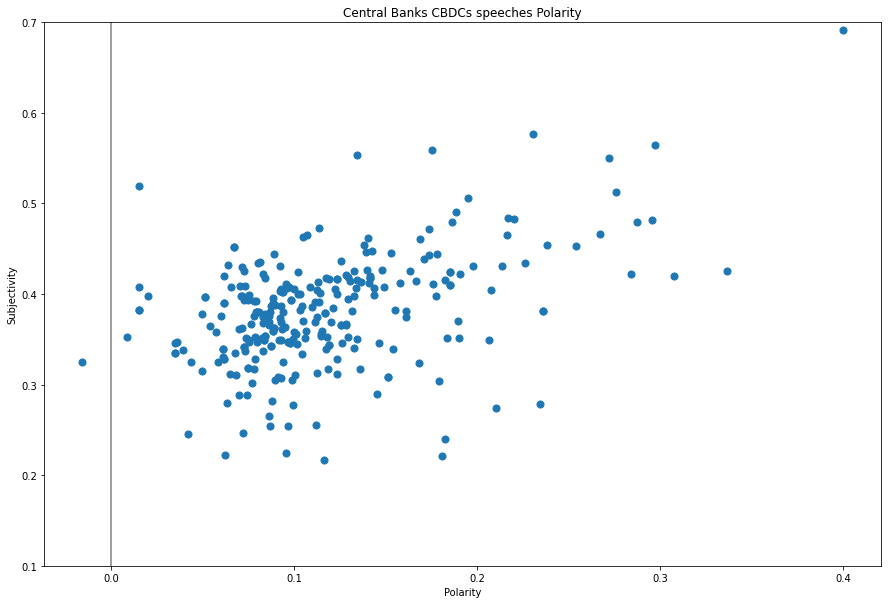

In [22]:
#@title

ax=df_CBDC.plot.scatter('Polarity','Subjectivity',ylim=[0.1,0.7],figsize=(15,10),s = 50)
plt.title('Central Banks CBDCs speeches Polarity')
plt.axvline(x=0, color='grey', label='axvline - full height')
plt.axhline(y=0, color='grey', label='axvline - full height')
#formatting
title = plt.title('Central Banks CBDCs speeches Polarity')
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16}) #Change font size

plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png');



> 2. Overall Polarity and distribution



2.396717357343218


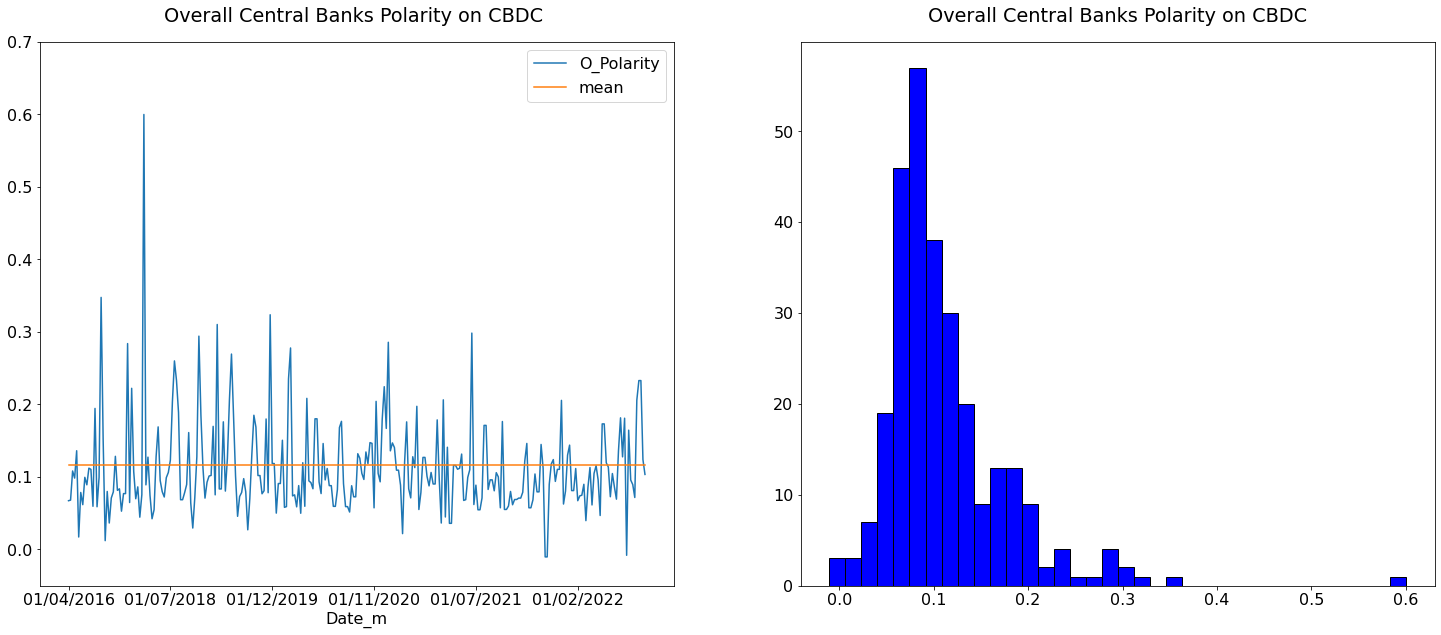

In [23]:
#@title
#Overall Polarity
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm,skew

#define subplot
fig, axes = plt.subplots(nrows=1, ncols=2)

#plotting data
df_CBDC.plot('Date_m', y=['O_Polarity','mean'],ylim=[-0.05,0.7],ax=axes[0],figsize=(25,10),title='Overall Central Banks Polarity on CBDC ',style={'F_Polarity': 'g'})
#plotting distribution

# Mean = 0, SD = 2.
plt.hist(df_CBDC['O_Polarity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5));

title = plt.title('Overall Central Banks Polarity on CBDC')
plt.rcParams.update({'font.size': 16}) #Change font size
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png');


print(skew(df_CBDC['O_Polarity']))





> 3. Polarity of CBDC speeches strictly



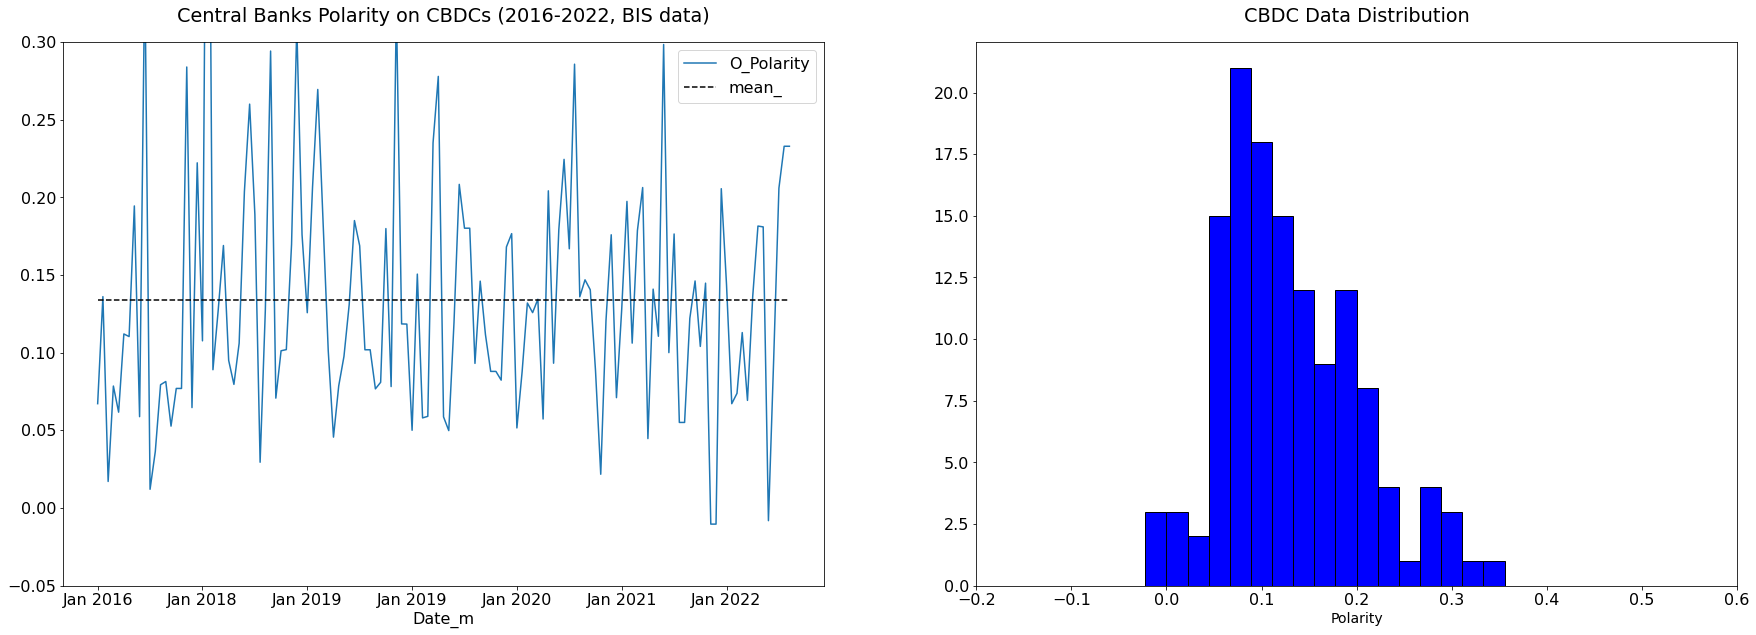

In [24]:
#@title
fig, axes = plt.subplots(nrows=1, ncols=2)

df_strcly_CBDC.plot(x='Date_m',y=['O_Polarity','mean_'],ylim = [-0.05,0.3],ax=axes[0],figsize=(30,10),style={'F_Polarity': 'b','mean_':'--k'},title='Central Banks Polarity on CBDCs (2016-2022, BIS data)')
#annotating max and mins
plt.margins(x=0)
#plotting fitted distribution
plt.hist(df_strcly_CBDC['O_Polarity'], color = 'b', edgecolor = 'black',bins = int(180/5),range=[-0.2,0.6])
plt.xlabel('Polarity',fontdict={'fontsize':'14'})
plt.xticks()
title = plt.title('CBDC Data Distribution')
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16}) #Change font size
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png')


> 4. Polarity of crypto




<ipython-input-25-99c64e687fa2>:17: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.hist(df_strcly_CBDC['F_Polarity'], color = 'B', edgecolor = 'b',bins = int(180/5),alpha=0.5,range=[-0.3,0.7])


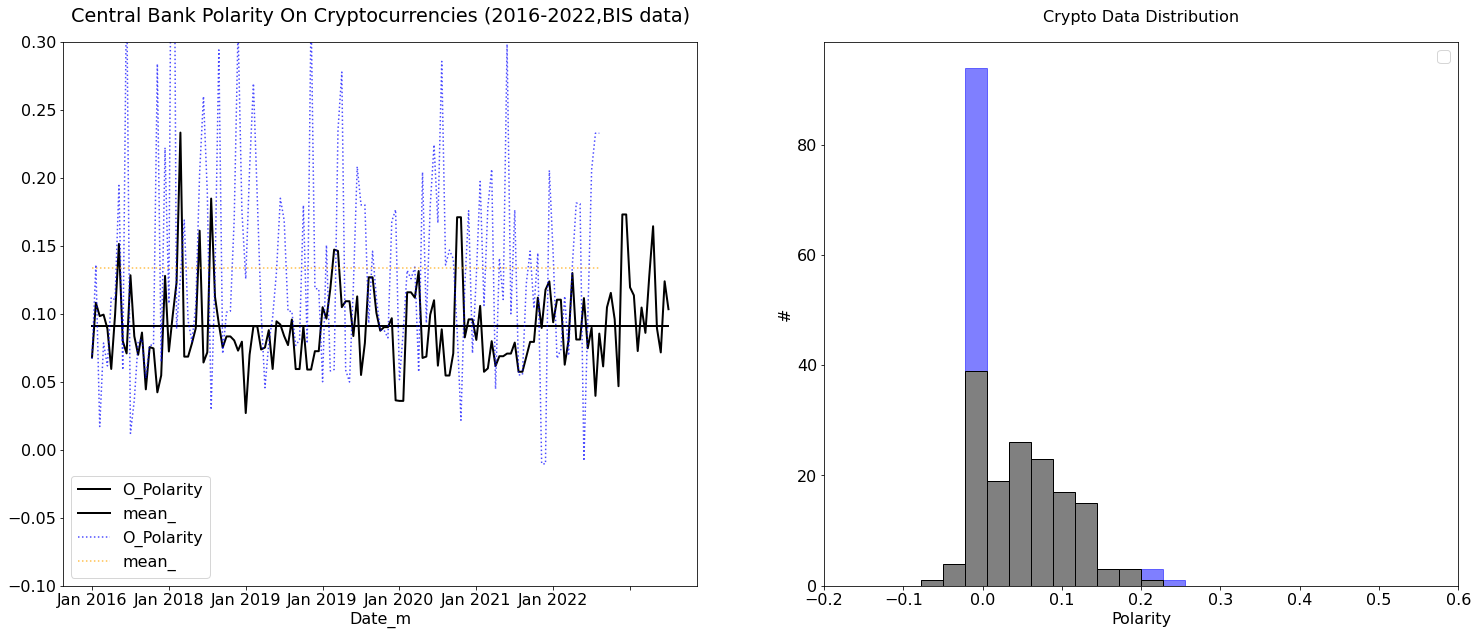

In [25]:
#@title
#Creating fid
fig, axes = plt.subplots(nrows=1, ncols=2)
df_crypto_from_CB.plot(x='Date_m',y=['O_Polarity','mean_'],
                       ylim = [-0.20,0.7],ax=axes[0],
                       figsize=(30,10),
                       style={'O_Polarity': 'k','mean_':'Black'},
                       title='Central Bank Polarity On Cryptocurrencies (2016-2022,BIS data)',
                       lw=2)
plt.margins(x=0)
plt.ylabel('#')
df_strcly_CBDC.plot(x='Date_m',y=['O_Polarity','mean_'],ylim = [-0.1,0.3],ax=axes[0],figsize=(25,10),style={'O_Polarity': 'b','mean_':'orange'},linestyle='dotted',alpha=0.7)
plt.legend({'O_Polarity':'Crypto_Polarity','mean':'Crypto_P_mean','O_Polarity':'CBDCs_Polarity','mean':'CBDCs_mean'})
#annotate

#visualising dist data 
plt.hist(df_strcly_CBDC['F_Polarity'], color = 'B', edgecolor = 'b',bins = int(180/5),alpha=0.5,range=[-0.3,0.7])
plt.hist(df_crypto_from_CB['F_Polarity'], color = 'grey', edgecolor = 'black',bins = int(180/5),range=[-0.3,0.7])
plt.xlim(-0.2,0.6)
plt.xlabel('Polarity')
#Formatting
title = plt.title('Crypto Data Distribution',fontdict={'fontsize':'16'})
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16}) #Change font size
#Saving plot
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png');



> 5. Plotting most negative and positive speeches frequent words in a map


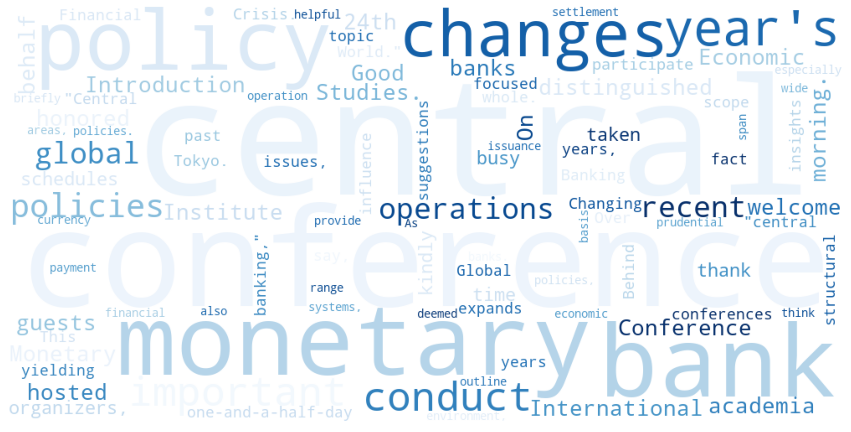

In [26]:
#@title
from PIL import Image
from wordcloud import WordCloud
import random 
# assume that this is the dictionary, feel free to change it
word_could_dict = [dict(i) for i in counter][45]
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/BIS Speeches data analysis/world-map-vector.png'))

wordcloud = WordCloud(background_color='white', colormap='Blues',width = 1000, height = 500).generate_from_frequencies(word_could_dict)

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud);

In [182]:
f, ((ax1, ax2, ax3)) = plt.subplots(1,3,sharex=False, sharey=False)

word_cloud_1 = [dict(i) for i in counter][top_3_positive[0]]
word_cloud_2 = [dict(i) for i in counter][top_3_positive[1]]
word_cloud_3 = [dict(i) for i in counter][top_3_positive[2]]

wordcloud_1 = WordCloud(background_color='White', colormap='Greens_r',width = 1000, height = 500).generate_from_frequencies(word_cloud_1)
wordcloud_2 = WordCloud(background_color='White', colormap='Greens_r',width = 1000, height = 500).generate_from_frequencies(word_cloud_2)
wordcloud_3 = WordCloud(background_color='White', colormap='Greens_r',width = 1000, height = 500).generate_from_frequencies(word_cloud_3)

plt.axis("off")
ax1.imshow(wordcloud_1)
ax1.axis("off")
ax2.imshow(wordcloud_2)
ax2.axis("off")
ax3.imshow(wordcloud_3)
ax3.axis("off")
f.set_figheight(30)
f.set_figwidth(100);

Output hidden; open in https://colab.research.google.com to view.

In [181]:
f, ((ax1, ax2, ax3)) = plt.subplots(1,3,sharex=False, sharey=False)

word_cloud_1 = [dict(i) for i in counter][top_3_negative[0]]
word_cloud_2 = [dict(i) for i in counter][top_3_negative[1]]
word_cloud_3 = [dict(i) for i in counter][top_3_negative[2]]

wordcloud_1 = WordCloud(background_color='White', colormap='Blues_r',width = 1000, height = 500).generate_from_frequencies(word_cloud_1)
wordcloud_2 = WordCloud(background_color='White', colormap='Blues_r',width = 1000, height = 500).generate_from_frequencies(word_cloud_2)
wordcloud_3 = WordCloud(background_color='White', colormap='Blues_r',width = 1000, height = 500).generate_from_frequencies(word_cloud_3)


ax1.imshow(wordcloud_1)
ax1.axis("off")
ax2.imshow(wordcloud_2)
ax2.axis("off")
ax3.imshow(wordcloud_3)
ax3.axis("off")
f.set_figheight(30)
f.set_figwidth(100);

Output hidden; open in https://colab.research.google.com to view.

> 6. Polarity by country central bank

In [147]:
df_CB_CBDC = (df_strcly_CBDC.groupby(['country_name']).O_Polarity.sum().reset_index()).sort_values(by='O_Polarity',ascending=False)
df_CB_CBDC.set_index('country_name',inplace=True)
df_CB_crypto = (df_crypto_from_CB.groupby(['country_name']).O_Polarity.sum().reset_index()).sort_values(by='O_Polarity',ascending=False)
df_CB_crypto.set_index('country_name',inplace=True)
df_CB_CBDC.head()

,O_Polarity
country_name,
United Kingdom,2.779548
Euro Area,2.311315
Germany,1.821522
Thailand,1.773398
Japan,1.010769


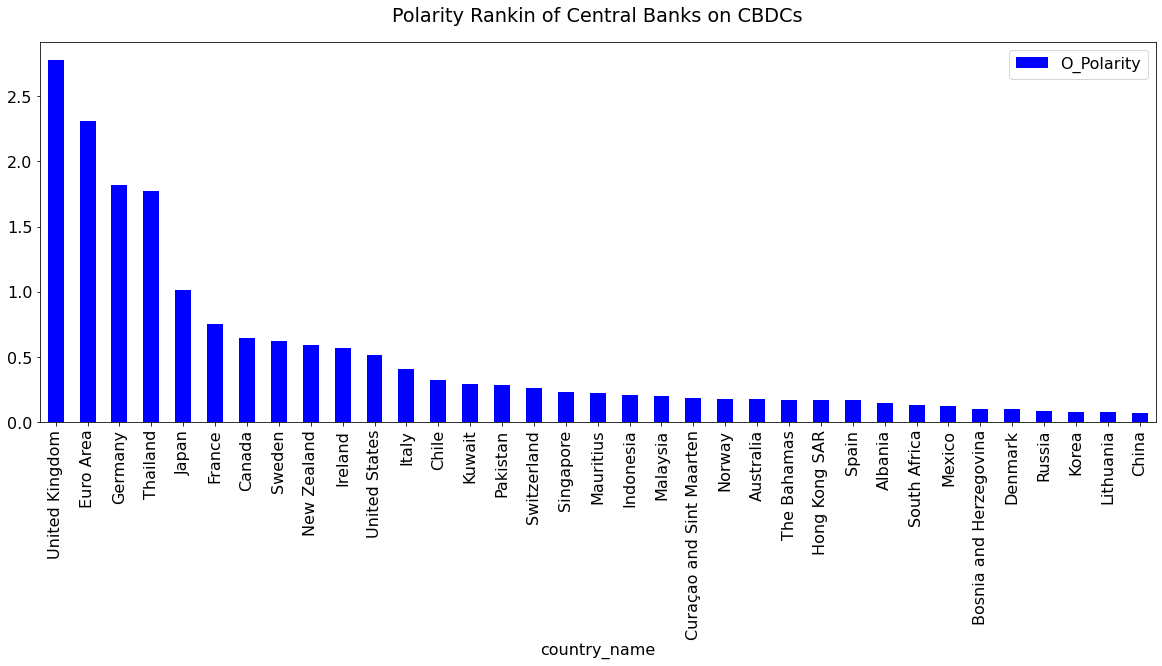

In [30]:
df_CB_CBDC.plot.bar(y=['O_Polarity'],figsize = (20,7),color=['b','b'],title='Polarity Rankin of Central Banks on CBDCs')

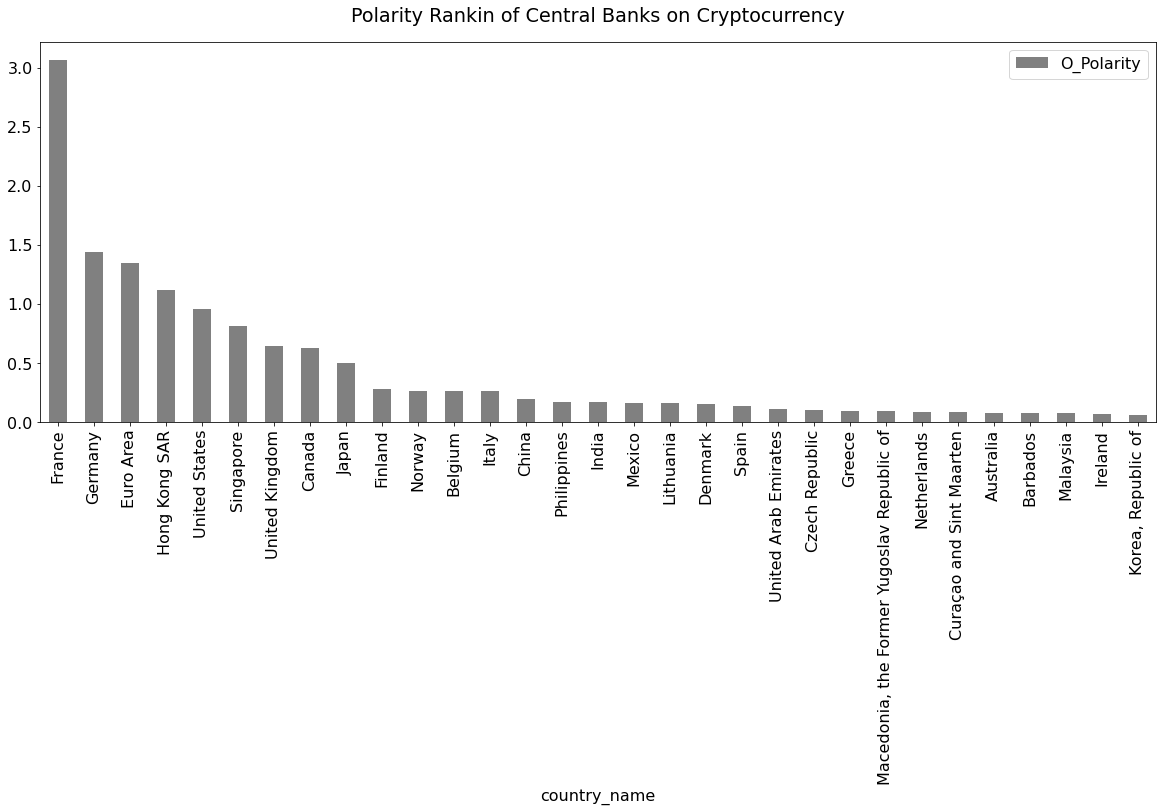

In [31]:
df_CB_crypto.plot.bar(y=['O_Polarity'],figsize = (20,7),color=['grey','b'],title='Polarity Rankin of Central Banks on Cryptocurrency')

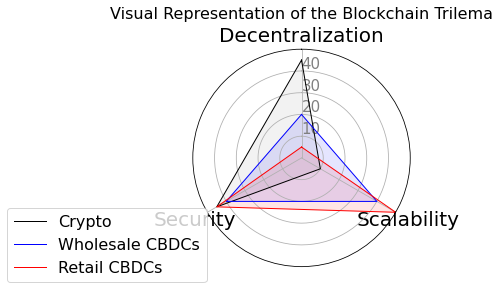

<Figure size 1440x1440 with 0 Axes>

In [33]:
#@title
#SOURCE: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Crypto','Wholesale CBDCs','Retail CBDCs'],
'Decentralization': [45,20, 5],
'Scalability': [10, 40, 50],
'Security': [45, 40, 45],
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40], ["10","20","30","40"], color="grey", size=15)
plt.xticks(size=20)
plt.ylim(0,50)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Crypto",color='k',)
ax.fill(angles, values, 'grey', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Wholesale CBDCs",color='b')
ax.fill(angles, values, 'blue', alpha=0.1)

# Ind2
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Retail CBDCs",color='r')
ax.fill(angles, values, 'r', alpha=0.1)


# Add legend
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))
#title
title = plt.title('Visual Representation of the Blockchain Trilema',size=16)
#saving
plt.figure(figsize=(20,20))
plt.rcParams['axes.titlepad'] = 20 
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png')
# Show the graph
plt.show()


# 2. Sentiment of Commercial bank headlines on CBDCs and crypto

In [34]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Google Searches analysis/Crypto_CommercialBanksHeadlines.txt','r') as f:
    crypto_headlines = json.load(f)
    f.close()
with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Google Searches analysis/CBDC_CommercialBanksHeadlines.txt') as f:
    cbdc_headlines = json.load(f)
    f.close()
#Creating Dataframe
df_google = pd.DataFrame(crypto_headlines.items(),columns=['Banks','crypto_Headlines'])
df_google['crypto_Sentiment'] = df_google['crypto_Headlines'].apply(lambda x: TextBlob(''.join([x for i in crypto_headlines if x not in stop_words])).sentiment) #apply texblob to cleaned str
df_google['cbdc_Headlines'] = cbdc_headlines.values()
df_google['cbdc_Sentiment'] = df_google['cbdc_Headlines'].apply(lambda x: TextBlob(''.join([x for i in crypto_headlines if x not in stop_words])).sentiment)
#Abreviating names
df_google.loc[[1],['Banks']] = 'ICBC'
df_google.loc[[25],['Banks']] = 'ANZ BG'

#expading sentiment measures into different columns
df_google[['crypto_Polarity','crypto_Subjectivity']] = df_google['crypto_Sentiment'].tolist()
df_google[['cbdc_Polarity','cbdc_Subjectivity']] = df_google['cbdc_Sentiment'].tolist()
df_google = df_google.sort_values(by='crypto_Polarity',ascending=False)
df_google.set_index('Banks',inplace=True)
df_google.head(3)

,crypto_Headlines,crypto_Sentiment,cbdc_Headlines,cbdc_Sentiment,crypto_Polarity,crypto_Subjectivity,cbdc_Polarity,cbdc_Subjectivity
Banks,,,,,,,,
Canadian Imperial Bank of Commerce,Tokenized Canadian Imperial Bank of Commerce -...,"(0.37777777777777666, 0.8111111111111119)",Legislative Covered Bond Programme - CIBC/CIBC...,"(0.0, 0.22499999999999978)",0.377778,0.811111,0.000000,0.225000
HDFC Bank,HDFC Bank withdraws its communication on crypt...,"(0.34999999999999987, 0.34999999999999987)",RBI CBDC: Digital Rupee pilot starts from Nove...,"(0.025, 0.09761904761904776)",0.350000,0.350000,0.025000,0.097619
Royal Bank of Canada,Royal Bank Of Canada - CoinDesk/Five things to...,"(0.3395833333333335, 0.5458333333333321)",Digital currencies and fintech: projects - Ban...,"(0.1865671641791045, 0.29850746268656747)",0.339583,0.545833,0.186567,0.298507




>**2.1. Top 50 Banks sentiment** 



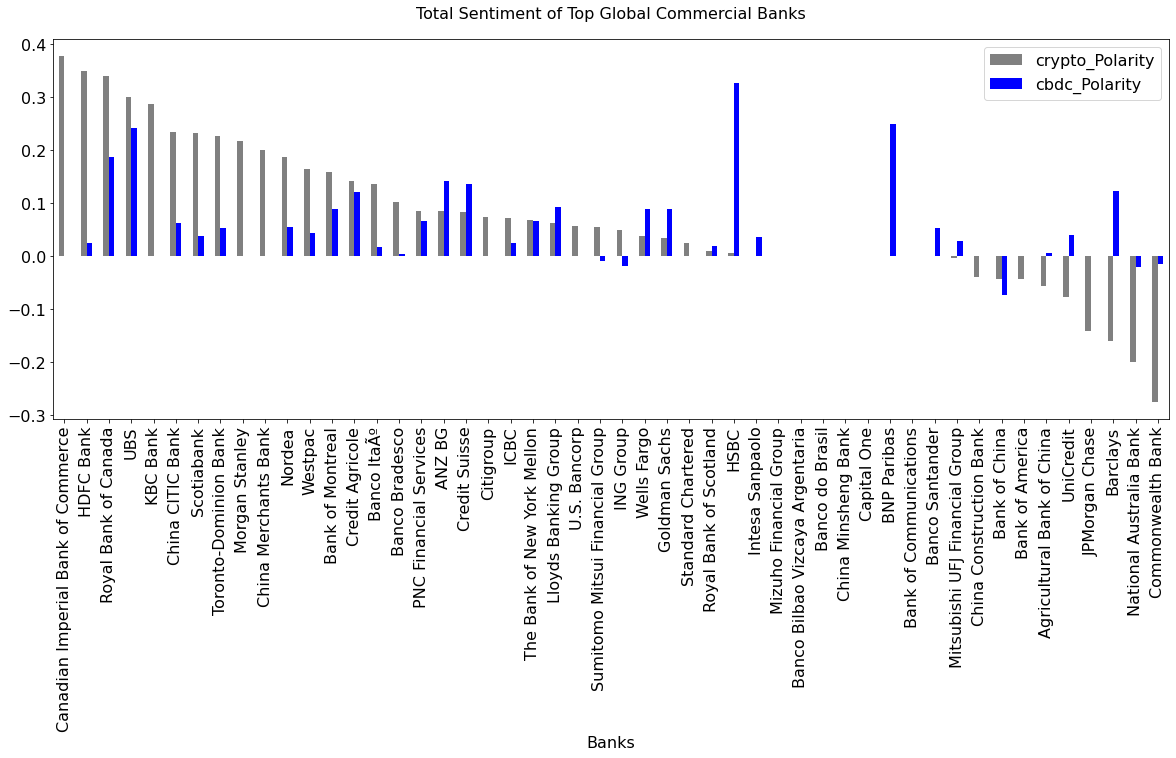

In [35]:
#@title
#Sentiment of each bank
df_google.plot.bar(y=['crypto_Polarity','cbdc_Polarity'],figsize = (20,7),color=['grey','b'])
title = plt.title('Total Sentiment of Top Global Commercial Banks',fontdict={'fontsize':'16'})
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16}) #Change font size
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png',bbox_inches = 'tight');

>**2.2.  Banks sentiment over time** 

In [223]:
with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Google Searches analysis/bydate_CBDC_ComBanksHeadlines.txt') as f:
    bydate_cbdc_headlines = json.load(f)
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Google Searches analysis/bydate_Crypto_ComBanksHeadlines.txt') as f:
    bydate_crypto_headlines = json.load(f)
    f.close()

df_ComBanks_sentiment_bydate = pd.DataFrame(bydate_crypto_headlines.items(),columns=['Date','crypto_headlines'])
df_ComBanks_sentiment_bydate['cbdc_headlines'] = bydate_cbdc_headlines.values()
df_ComBanks_sentiment_bydate['cbdc_headlines'] = df_ComBanks_sentiment_bydate['cbdc_headlines'].apply(lambda x: ''.join(x))
df_ComBanks_sentiment_bydate['crypto_headlines'] = df_ComBanks_sentiment_bydate['crypto_headlines'].apply(lambda x: ''.join(x))
df_ComBanks_sentiment_bydate.head()

#applying sentiment analysis
df_ComBanks_sentiment_bydate['cbdc_Sentiment'] = df_ComBanks_sentiment_bydate['cbdc_headlines'].apply(lambda x: TextBlob(''.join([x for i in bydate_cbdc_headlines if x not in stop_words])).sentiment)
df_ComBanks_sentiment_bydate['crypto_Sentiment'] = df_ComBanks_sentiment_bydate['crypto_headlines'].apply(lambda x: TextBlob(''.join([x for i in bydate_crypto_headlines if x not in stop_words])).sentiment)
df_ComBanks_sentiment_bydate[['crypto_Polarity','crypto_Subjectivity']] = df_ComBanks_sentiment_bydate['crypto_Sentiment'].tolist()
df_ComBanks_sentiment_bydate[['cbdc_Polarity','cbdc_Subjectivity']] = df_ComBanks_sentiment_bydate['cbdc_Sentiment'].tolist()
df_ComBanks_sentiment_bydate.head(50)

,Date,crypto_headlines,cbdc_headlines,cbdc_Sentiment,crypto_Sentiment,crypto_Polarity,crypto_Subjectivity,cbdc_Polarity,cbdc_Subjectivity
0,2016,2016 in Headlines: The Year's 13 Biggest Block...,The macroeconomics of central bank issued digi...,"(0.0, 0.08333333333333333)","(0.10135135135135073, 0.3040540540540537)",0.101351,0.304054,0.000000,0.083333
1,2017,Historical Snapshot - 17 December 2017 | CoinM...,Central Bank Digital Currencies: assessing imp...,"(-0.06152493957372046, 0.10580092287409361)","(0.19988577955454026, 0.05996573386636171)",0.199886,0.059966,-0.061525,0.105801
2,2018,Historical Snapshot - 07 January 2018 | CoinMa...,Monetary policy implications of central bank-i...,"(0.04602272727272776, 0.20340909090909454)","(0.186044666587329, 0.584513467412419)",0.186045,0.584513,0.046023,0.203409
3,2019,2019: The Year in Cryptocurrency - trimplement...,Designing Central Bank Digital CurrenciesCentr...,"(0.0, 0.11946290143964487)","(0.25341474445952056, 0.14405246494798807)",0.253415,0.144052,0.000000,0.119463
4,2020,Bitcoin Prices in 2020: Here's What Happened -...,Responses to the Bank of England's March 2020 ...,"(0.0, 0.08333333333333333)","(0.31212121212121224, 0.48484848484848325)",0.312121,0.484848,0.000000,0.083333
5,2021,This is how the top cryptocurrencies performed...,Results of the 2021 BIS survey on central bank...,"(0.00666666666666671, 0.08666666666666717)","(0.2, 0.4800000000000052)",0.200000,0.480000,0.006667,0.086667
6,2022,15 New Cryptocurrency to Buy in November 2022 ...,The race to digital money is on – PwC's 2022 C...,"(0.015384615384615484, 0.1384615384615383)","(0.3510096202385572, 0.4536288636003007)",0.351010,0.453629,0.015385,0.138462


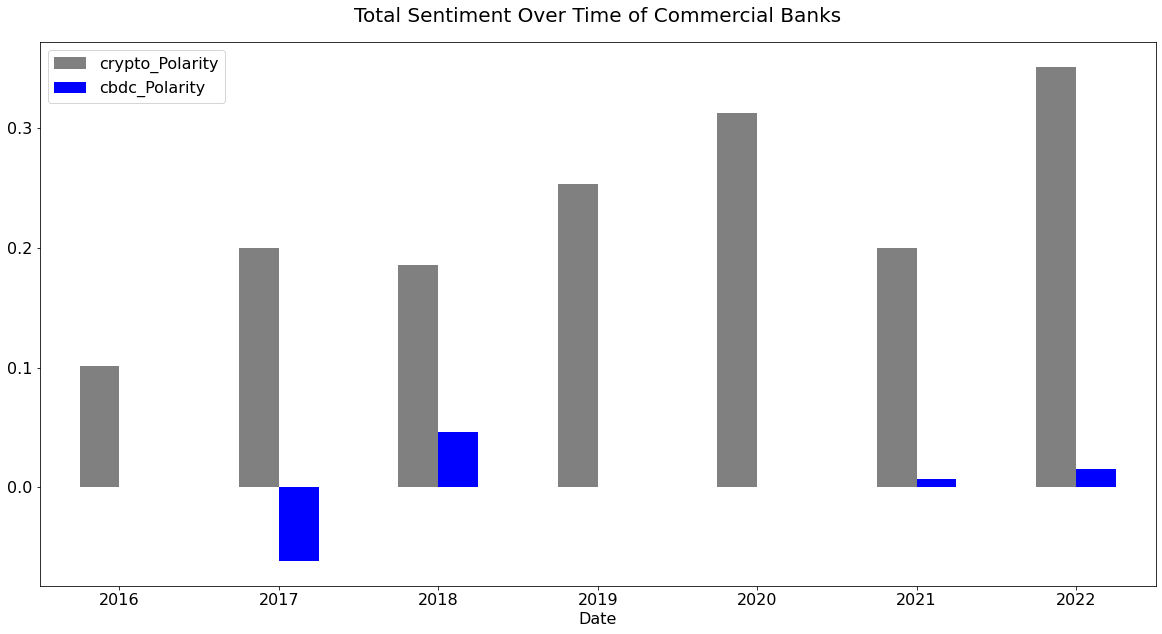

In [37]:
#@title
from IPython.utils.py3compat import annotate
df_ComBanks_sentiment_bydate.plot.bar(x='Date',y=['crypto_Polarity','cbdc_Polarity'],figsize = (20,10),rot=0,color=['grey','b'])

plt.rcParams.update({'font.size': 16}) #Change font size
plt.rcParams['axes.titlepad'] = 20
title = plt.title('Total Sentiment Over Time of Commercial Banks',fontsize=20)
plt.rcParams.update({'font.size': 16}) #Change font size
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png');

>**2.3.  Correlation between Commercial Banks sentiment and yearly returns**

In [38]:
ticker = pd.DataFrame(yf.Ticker('BTC-USD').history(start='2016-01-01',end='2022-08-01',period='1Y',interval='1mo')['Close'])
ticker['returns']= ticker.Close.pct_change()
ticker['returns'][0]=ticker.loc[(ticker['returns']==np.NaN)] = 0
ticker['log_ret']=np.log(ticker.Close) - np.log(ticker.Close.shift(1))
ticker = ticker.reset_index()
ticker_filtered = ticker.loc[ticker['Date'].dt.month == 1]
# ticker_redimensioned = ticker.loc[(ticker['Date'] =)]
ticker_filtered.head()

,Date,Close,returns,log_ret
0,2016-01-01 00:00:00+00:00,368.766998,0.000000,NaN
12,2017-01-01 00:00:00+00:00,970.403015,0.006911,0.006887
24,2018-01-01 00:00:00+00:00,10221.099609,-0.277987,-0.325713
36,2019-01-01 00:00:00+00:00,3457.792725,-0.076124,-0.079177
48,2020-01-01 00:00:00+00:00,9350.529297,0.299840,0.262241


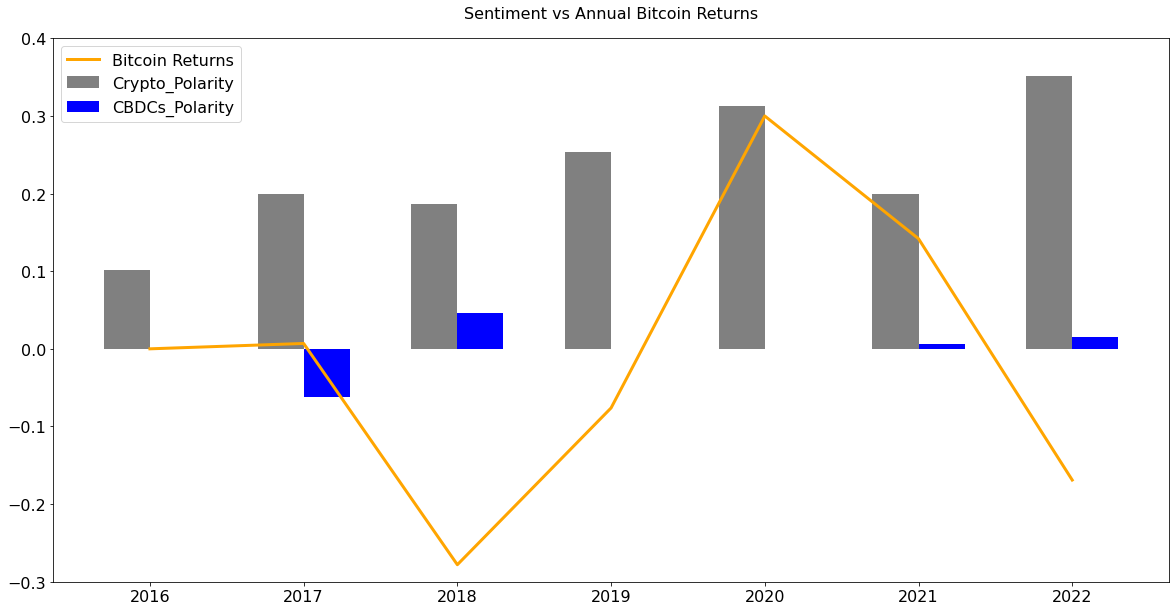

In [39]:
#@title
fig.clear(True)
X_axis = np.arange(len(df_ComBanks_sentiment_bydate.Date))
plt.figure(figsize=(20,10))
plt.bar(X_axis - 0.15,df_ComBanks_sentiment_bydate.crypto_Polarity , 0.3, label = 'Crypto_Polarity',color='grey')
plt.bar(X_axis + 0.15,df_ComBanks_sentiment_bydate.cbdc_Polarity , 0.3, label = 'CBDCs_Polarity',color='b')
plt.ylim([-0.30,0.4])
plt.plot(X_axis,ticker_filtered.returns, label = 'Bitcoin Returns',lw=3,color='orange')
plt.xticks(X_axis, df_ComBanks_sentiment_bydate.Date)
plt.legend(loc='best')

title = plt.title('Sentiment vs Annual Bitcoin Returns',fontdict={'fontsize':'16'})
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16}) #Change font size
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png')
plt.show()




> **2.4 Plotting yearly correlation of sentiment to BTC returns** 



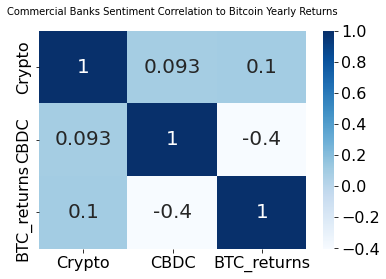

In [40]:
#@title
math = np.corrcoef([df_ComBanks_sentiment_bydate.crypto_Polarity,df_ComBanks_sentiment_bydate.cbdc_Polarity],ticker_filtered.returns)

#plot heatmap
sns.heatmap(math, annot=True,cmap='Blues',yticklabels=['Crypto','CBDC','BTC_returns'],xticklabels=['Crypto','CBDC','BTC_returns'],annot_kws={'fontsize': 20})
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("white")

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlepad'] = 16 
title = plt.title('Commercial Banks Sentiment Correlation to Bitcoin Yearly Returns',fontsize=10)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png')

>**2.5.  Investment in blockchain/crypto projects vs. Sentiment**

In [41]:
with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Commercial_Banks/Commercial_Banks_Investments.csv') as f:
    df_ComB_Investment_sentiment = pd.read_csv(f)
    f.close
#Cleaning
df_ComB_Investment_sentiment = df_ComB_Investment_sentiment['Bank;AUM;Investments_millions'].str.split(';',expand = True) #crating a column with investments
df_ComB_Investment_sentiment.rename(columns={0:'Banks',1:'AUM',2:'Investment_in_crypto_related'},inplace=True)
df_ComB_Investment_sentiment.drop(index=0)
df_ComB_Investment_sentiment['AUM']=df_ComB_Investment_sentiment.AUM.astype(int)
df_ComB_Investment_sentiment['Investment_in_crypto_related']=df_ComB_Investment_sentiment.Investment_in_crypto_related.astype(int)

#Inserting Sentiment data
sentiment = []

for i in df_ComB_Investment_sentiment['Banks']:
    
    if i in df_google.index:
        sentiment.append(df_google['crypto_Polarity'].loc[i])
    else: 
        print('not found')

#inserting ratio of investmetn in crypto
df_ComB_Investment_sentiment['ratio_amount'] = (df_ComB_Investment_sentiment['Investment_in_crypto_related'] / df_ComB_Investment_sentiment['AUM'])*100
df_ComB_Investment_sentiment['Crypto_Polarity'] = sentiment #Inserting sentiment of each bank to table

df_ComB_Investment_sentiment.head()

,Banks,AUM,Investment_in_crypto_related,ratio_amount,Crypto_Polarity
0,The Bank of New York Mellon,470000,321,0.068298,0.068182
1,Citigroup,2260000,279,0.012345,0.075000
2,UBS,1126000,266,0.023623,0.300000
3,BNP Paribas,3081000,236,0.007660,0.000000
4,Morgan Stanley,116000,234,0.201724,0.216667


>>**2.5.1 Inserting FOMO and FUD measures**

In [42]:
df_ComB_Investment_sentiment['Banks'].loc[0]='BNY Mellon'
df_ComB_Investment_sentiment['Banks'].loc[6]='JPMorgan'
df_ComB_Investment_sentiment['Banks'].loc[8]='ING'
df_ComB_Investment_sentiment['Banks'].loc[9]='BBVA'
#Calculating FOMO and FUD
df_ComB_Investment_sentiment['Coherence'] = df_ComB_Investment_sentiment['Crypto_Polarity']-df_ComB_Investment_sentiment['ratio_amount']
#df_ComB_Investment_sentiment['bottom'] = [df_ComB_Investment_sentiment['ratio_amount'].loc[i] if df_ComB_Investment_sentiment['Crypto_Polarity'].loc[i]>0 else for i in df_ComB_Investment_sentiment['ratio_amount']]
df_ComB_Investment_sentiment = df_ComB_Investment_sentiment.sort_values(by='ratio_amount',ascending=False)
df_ComB_Investment_sentiment.head(10)

,Banks,AUM,Investment_in_crypto_related,ratio_amount,Crypto_Polarity,Coherence
4,Morgan Stanley,116000,234,0.201724,0.216667,0.014943
0,BNY Mellon,470000,321,0.068298,0.068182,-0.000116
2,UBS,1126000,266,0.023623,0.300000,0.276377
9,BBVA,796000,167,0.020980,0.000000,-0.020980
6,JPMorgan,1163000,204,0.017541,0.034091,0.016550
8,ING,1147000,170,0.014821,0.050000,0.035179
1,Citigroup,2260000,279,0.012345,0.075000,0.062655
7,Barclays,1842000,196,0.010641,-0.160000,-0.170641
3,BNP Paribas,3081000,236,0.007660,0.000000,-0.007660
5,JPMorgan Chase,3386000,206,0.006084,-0.141667,-0.147751


>**5.6** Plotting Investment vs. sentiment

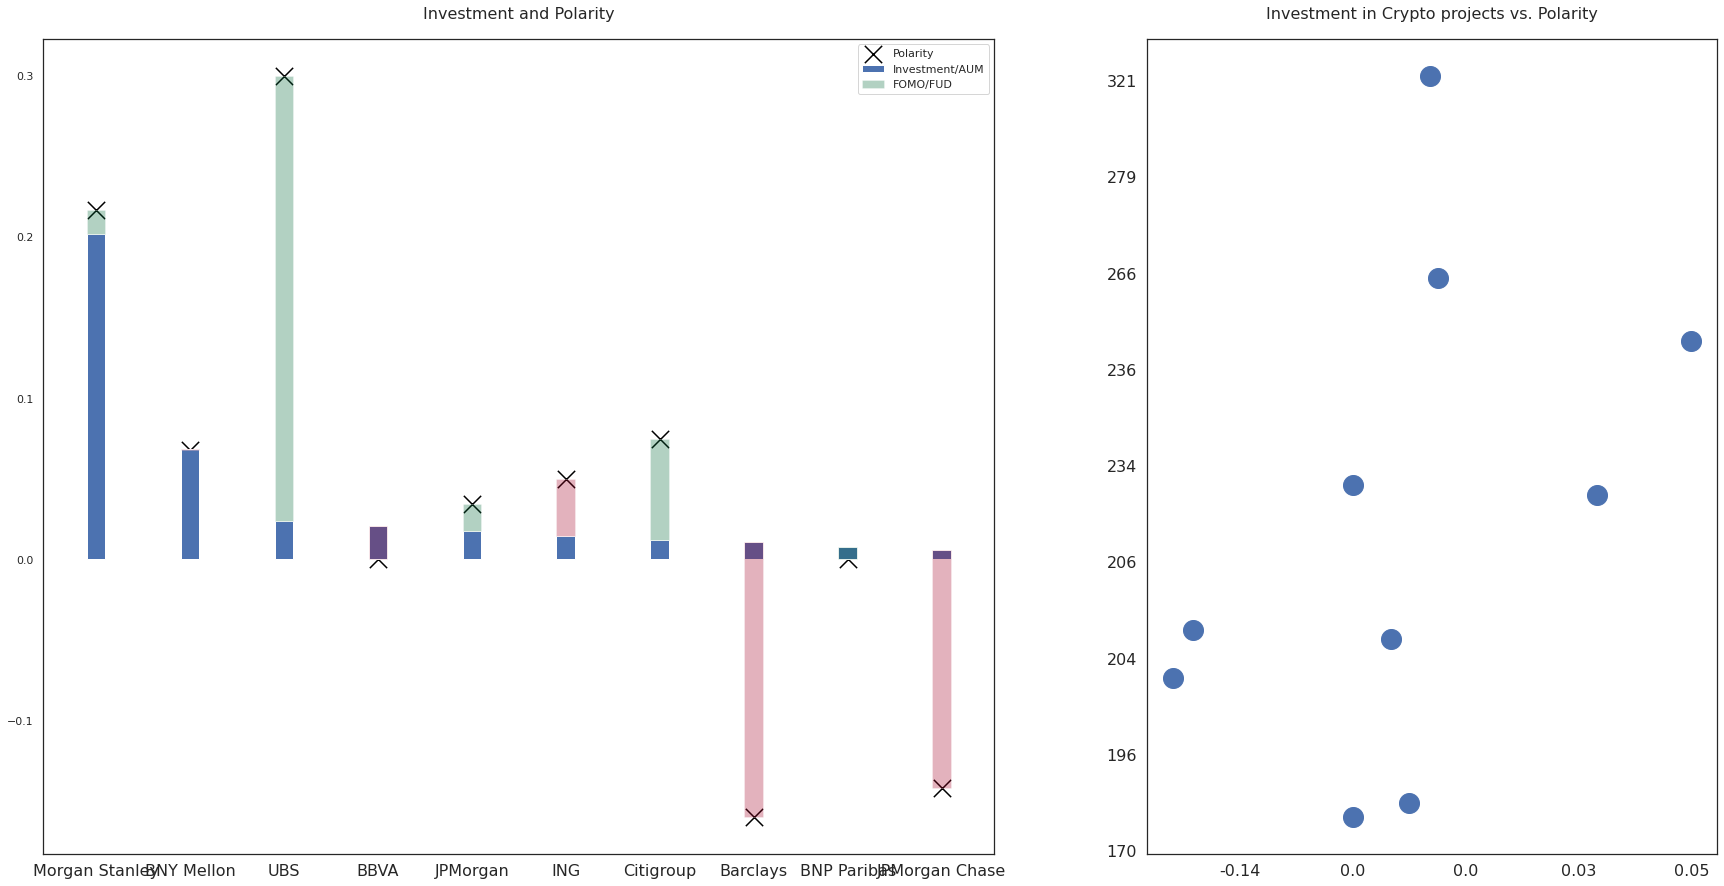

In [222]:
#@title
from matplotlib.colors import Colormap
f, ((ax1, ax2)) = plt.subplots(1,2,sharex=False, sharey=False,gridspec_kw={'width_ratios': [5, 3]})
X_axis = np.arange(len(df_ComB_Investment_sentiment.Banks))
#AX1 
ax1.bar(X_axis, df_ComB_Investment_sentiment.ratio_amount,width=0.2,color='b',label='Investment/AUM') #Columns
  #plotting difference between ratio and sentiment
colors = [100,-100]
colormap = plt.cm.get_cmap('RdYlGn', 10)
ax1.bar(X_axis, df_ComB_Investment_sentiment.Coherence,width=0.2,bottom=df_ComB_Investment_sentiment.ratio_amount, color = colormap(colors),alpha=0.3,label='FOMO')
ax1.scatter(X_axis,df_ComB_Investment_sentiment.Crypto_Polarity,s=300,color='black',marker='x' ,label='Polarity',)
ax1.legend(['Polarity','Investment/AUM','FOMO/FUD'])
ax1.set_xticks(X_axis)
ax1.set_xticklabels(df_ComB_Investment_sentiment.Banks,fontdict={'fontsize':16})
# ax1.set_yticklabels(df_ComB_Investment_sentiment.Crypto_Polarity.round(2),fontdict={'fontsize':16})
ax1.set_title('Investment and Polarity',fontdict={'fontsize':16})

#ax2 scatter relating Investment to polarity
ax2.scatter(df_ComB_Investment_sentiment.Crypto_Polarity,df_ComB_Investment_sentiment.Investment_in_crypto_related,s=400)
ax2.set_xticklabels(df_ComB_Investment_sentiment.Crypto_Polarity.sort_values().round(2),fontdict={'fontsize':16})
ax2.set_yticklabels(df_ComB_Investment_sentiment.Investment_in_crypto_related.sort_values(ascending=True),fontdict={'fontsize':16})

#formatting

title = plt.title('Investment in Crypto projects vs. Polarity',fontdict={'fontsize':'16'})
sns.set(rc={"figure.figsize":(30, 15),'axes.facecolor':'white'})#sns style
sns.set_style("white")
plt.rcParams['axes.titlepad'] = 20 
#plt.rcParams.update({'font.size': 16}) #Change font size
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title.get_text()}.png',bbox_inches = 'tight')
plt.show()

# 3. Building a Model that predicts Bitcoin Price

The first model is a linear model that takes sentiment as feature to predict the logarithmic close price of Bitcoin.

    log_close = β0 + β1*Sentiment + ε
---
The second model is a polynomial model of degree 4 that takes the same variables.

    log_close = β0 + β1*Sentiment^1 + β2*Sentiment^2 + β3*Sentiment^3 + β4*Sentiment^4 + ε
---
The final model will take the weights of the predicted values from each model.

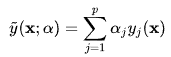



    







>**3.1.**   Getting Data















>> Google  NEWS



In [44]:
import json
import pandas as pd
from nltk.corpus import stopwords

#Reading json object containing daily news
with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Regression Model/cryptocurrency_news.txt') as f:
    dct = json.load(f)

dates = list(dct.keys())
filter_for_BTC = [i for i in dct.values()]
cleaned_news = []

for i in filter_for_BTC:
    
    j = (' '.join(i)).replace('...','').replace('-','').replace(':','')

    cleaned_news.append(' '.join([i for i in j.split(' ') if i not in stop_words]))
    

news_dict = {i:v for i,v in (zip(dates,cleaned_news))}


df = pd.DataFrame(news_dict.items())
df.rename(columns={1:'Day_news',0:'Date'},inplace=True)
df.head()

,Date,Day_news
0,1/1/2016,Bitcoin's Big Challenge 2016 Reaching 100 Mill...
1,2/1/2016,CRYPTO20 Tokenized Cryptocurrency Index Fund ...
2,3/1/2016,Ethereum Announces Launch Homestead Cointeleg...
3,4/1/2016,Vatican Slated State Adopters Cryptocurrency A...
4,5/1/2016,ELSAGB Societatea Energetica Electrica SA CNB...




>>Sentiment Data



In [45]:
from textblob import TextBlob

Polarity = []

for i in df['Day_news']:

    Pol = list(TextBlob(i).sentiment)[0]
    Polarity.append(Pol)
    
df['Sentiment'] = [i for i in Polarity]

dates = []

for i in df['Date']: #Changing format of dates so that we can iterate in yfinance and get the exact price of bitcoin for each data entry
    
    date = '-'.join([i.zfill(2) for i in i.split('/')][::-1])
    dates.append(date)
    
df['Date'] = dates

df.head()

,Date,Day_news,Sentiment
0,2016-01-01,Bitcoin's Big Challenge 2016 Reaching 100 Mill...,0.213095
1,2016-01-02,CRYPTO20 Tokenized Cryptocurrency Index Fund ...,0.146259
2,2016-01-03,Ethereum Announces Launch Homestead Cointeleg...,0.028571
3,2016-01-04,Vatican Slated State Adopters Cryptocurrency A...,0.241667
4,2016-01-05,ELSAGB Societatea Energetica Electrica SA CNB...,0.144540




>>Price of Observed Dates



In [46]:
#Getting price of bitcoin for each date
import yfinance as yf

ticker = 'BTC-USD'
daily_price = []

price = pd.DataFrame(yf.download(tickers=ticker,interval='1d',start=dates[0],end=dates[-1])['Close'])
price.reset_index(inplace=True)
price['Date'] = price['Date'].astype(str)
price.head()


[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991




>>Getting Number of active wallets from the Nasdaq API







In [47]:
Unique_Bitcoin_Addresses_Used = quandl.get("BCHAIN/NADDU", authtoken="CqkTr5TojPWtAYG_4VtQ")
Unique_Bitcoin_Addresses_Used['log_amounts'] =np.log2(Unique_Bitcoin_Addresses_Used['Value'])
Unique_Bitcoin_Addresses_Used.reset_index(inplace=True)
Unique_Bitcoin_Addresses_Used.head(-10)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Value,log_amounts
0,2009-01-02,1.0,0.000000
1,2009-01-03,0.0,-inf
2,2009-01-04,0.0,-inf
3,2009-01-05,0.0,-inf
4,2009-01-06,0.0,-inf
...,...,...,...
5091,2022-12-11,570664.0,19.122282
5092,2022-12-12,639530.0,19.286653
5093,2022-12-13,710573.0,19.438623
5094,2022-12-14,673994.0,19.362376


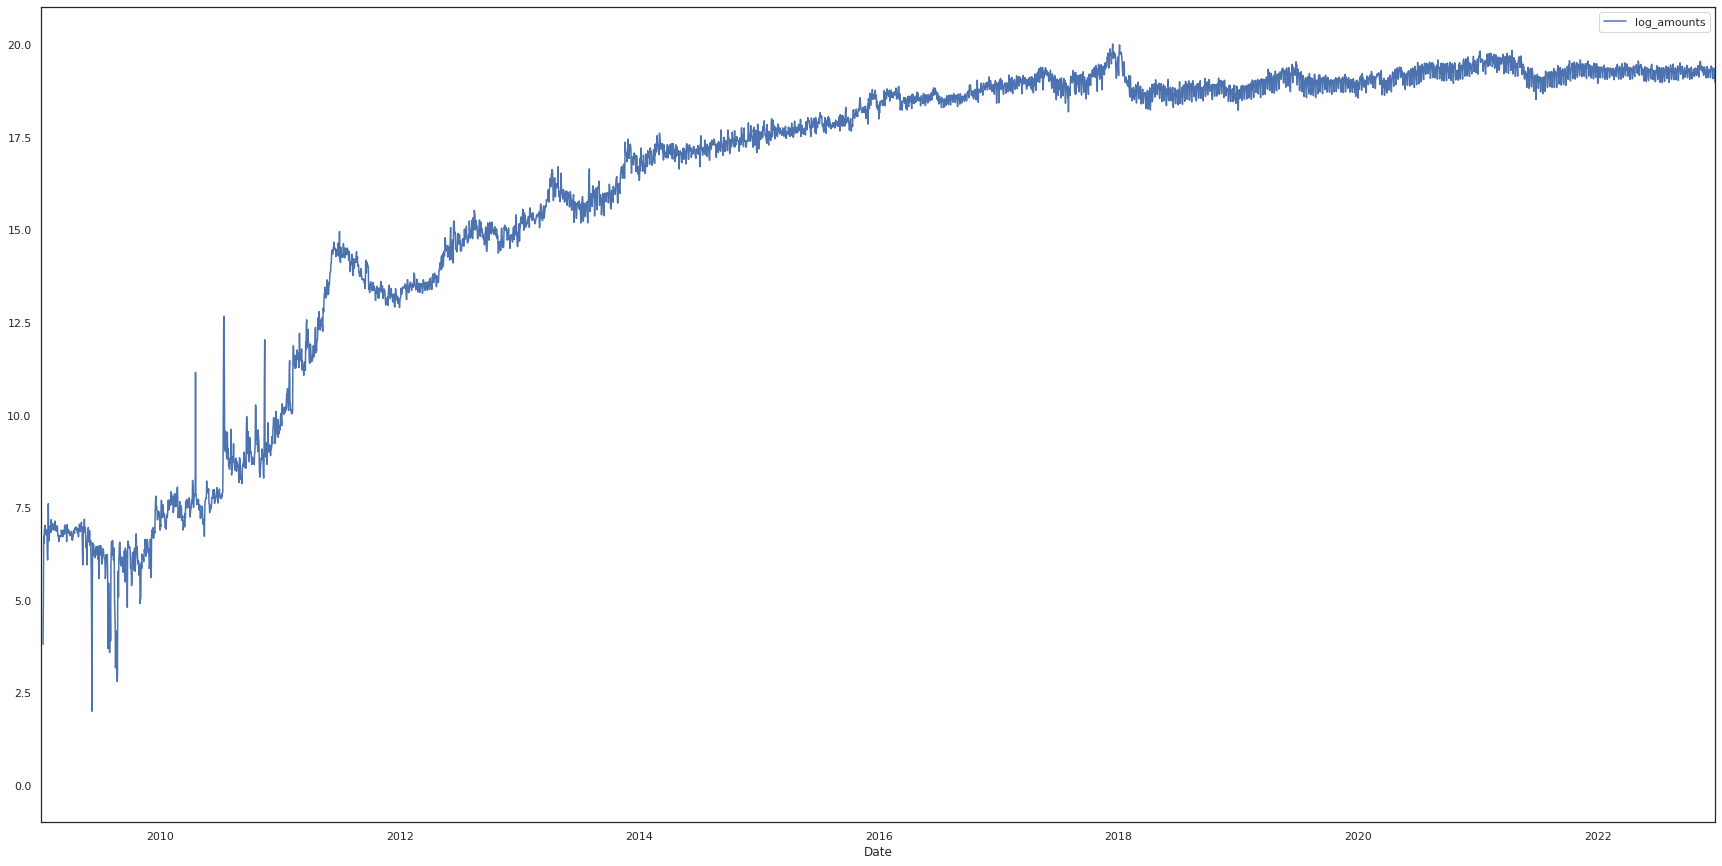

In [48]:
Unique_Bitcoin_Addresses_Used.plot(x = 'Date',y = 'log_amounts')
title = 'Unique Bitcoin Addresses'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

>**3.2.   Linear OLS regression**

>>3.2.1 Cleaning the data for X and y

In [49]:
import numpy as np
filtered_prices = []

df_model = pd.DataFrame.merge(df,price,on='Date')
df_model['Date'] = df_model.Date.astype('datetime64')
df_model['returns'] = df_model['Close'].pct_change() #returns
#to test if it is more dependent or independent compared to sentiment
#to test if it is a consequence of returns or not
df_model['Day_news'].replace('', np.nan, inplace=True)
df_model.dropna(subset=['Day_news'],inplace= True)
df_model['Sent'] = (df_model['Sentiment'].pct_change())
#------------------------------------------------------------------------------------ Wallets
df_model['Wallets'] = Unique_Bitcoin_Addresses_Used['Value']
#------------------------------------------------------------------------------------ Exponential Moving average
df_model['Sentiment_EMA'] = df_model['Sentiment'].ewm(span=360, adjust=False).mean()
df_model['returns_EMA'] = df_model['returns'].ewm(span=360, adjust=False).mean()
df_model['Close_EMA'] = df_model['Close'].ewm(span=360, adjust=False).mean()
df_model['lag_Sentiment_EMA'] = df_model['Sentiment_EMA'].shift(14)
df_model['lag_returns_EMA'] = df_model['returns_EMA'].shift(7)
df_model['Wallets_EMA'] = df_model['Wallets'].ewm(span=365, adjust=False).mean()
#------------------------------------------------------------------------------------
df_model = df_model[df_model['Day_news'].str.contains('bitcoin')] #cell filtering days where bitcoin is mentioned
#------------------------------------------------------------------------------------
df_model['log_close'] = np.log(df_model.Close)
df_model['log_sentiment'] = np.log(df_model.Sentiment)
df_model['log_sentiment_EMA'] = np.log(df_model.Sentiment_EMA)
df_model['log_Wallets'] = np.log(df_model.Wallets)
#------------------------------------------------------------------------------------ QUANTILES for outliers in sentiment change (infinity values i.e)
Q1 = df_model['returns'].quantile(0.15)
Q3 = df_model['returns'].quantile(0.85)
IQR = Q3 - Q1
# #--------------
df_model = df_model[~((df_model['returns'] < (Q1 - 1.5 * IQR)) | (df_model['returns'] > (Q3 + 1.5 * IQR)))]
Q1_sent = df_model['Sentiment'].quantile(0.25)
Q3_sent = df_model['Sentiment'].quantile(0.75)
IQR_sent = Q3_sent - Q1_sent
df_model = df_model[~((df_model['Sentiment'] < (Q1_sent - 1.5 * IQR_sent)) | (df_model['Sentiment'] > (Q3_sent + 1.5 * IQR_sent)))]
df_model_cleaned = df_model[['Date','Close','Sentiment']]
df_model_cleaned['pctCSENT'] = df_model_cleaned['Sentiment'].pct_change()


df_model.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Day_news,Sentiment,Close,returns,Sent,Wallets,Sentiment_EMA,returns_EMA,Close_EMA,lag_Sentiment_EMA,lag_returns_EMA,Wallets_EMA,log_close,log_sentiment,log_sentiment_EMA,log_Wallets
13,2016-01-14,News CoinDesk Finance Magnates Financial Busi...,0.000000,430.306000,-0.004776,-1.000000,117.0,0.205201,-0.001960,434.684360,NaN,-0.001687,4.885335,6.064497,-inf,-1.583763,4.762174
23,2016-01-24,Bank Of France Governor Bitcoin 'Isn't Cryptoc...,-0.020000,402.971008,0.039949,-0.666667,116.0,0.199790,-0.002062,432.303061,0.209037,-0.002492,10.558623,5.998865,NaN,-1.610487,4.753590
33,2016-02-05,Bitcoin Australian Craig Wright confirms creat...,0.116667,386.549011,-0.007816,0.019868,119.0,0.195200,-0.002152,429.647461,0.201904,-0.002135,16.390112,5.957259,-2.148434,-1.633732,4.779123
48,2016-02-20,Swedish Police Seek EU Funds Cryptocurrency Re...,0.080000,437.164001,0.038925,-0.488000,129.0,0.191498,-0.001290,427.055646,0.195226,-0.001974,25.060355,6.080308,-2.525729,-1.652877,4.859812
49,2016-02-21,XRP News Investing.com XRP News Investing.co...,-0.200000,438.798004,0.003738,-3.500000,122.0,0.189329,-0.001262,427.120700,0.194145,-0.001746,25.590080,6.084039,NaN,-1.664268,4.804021


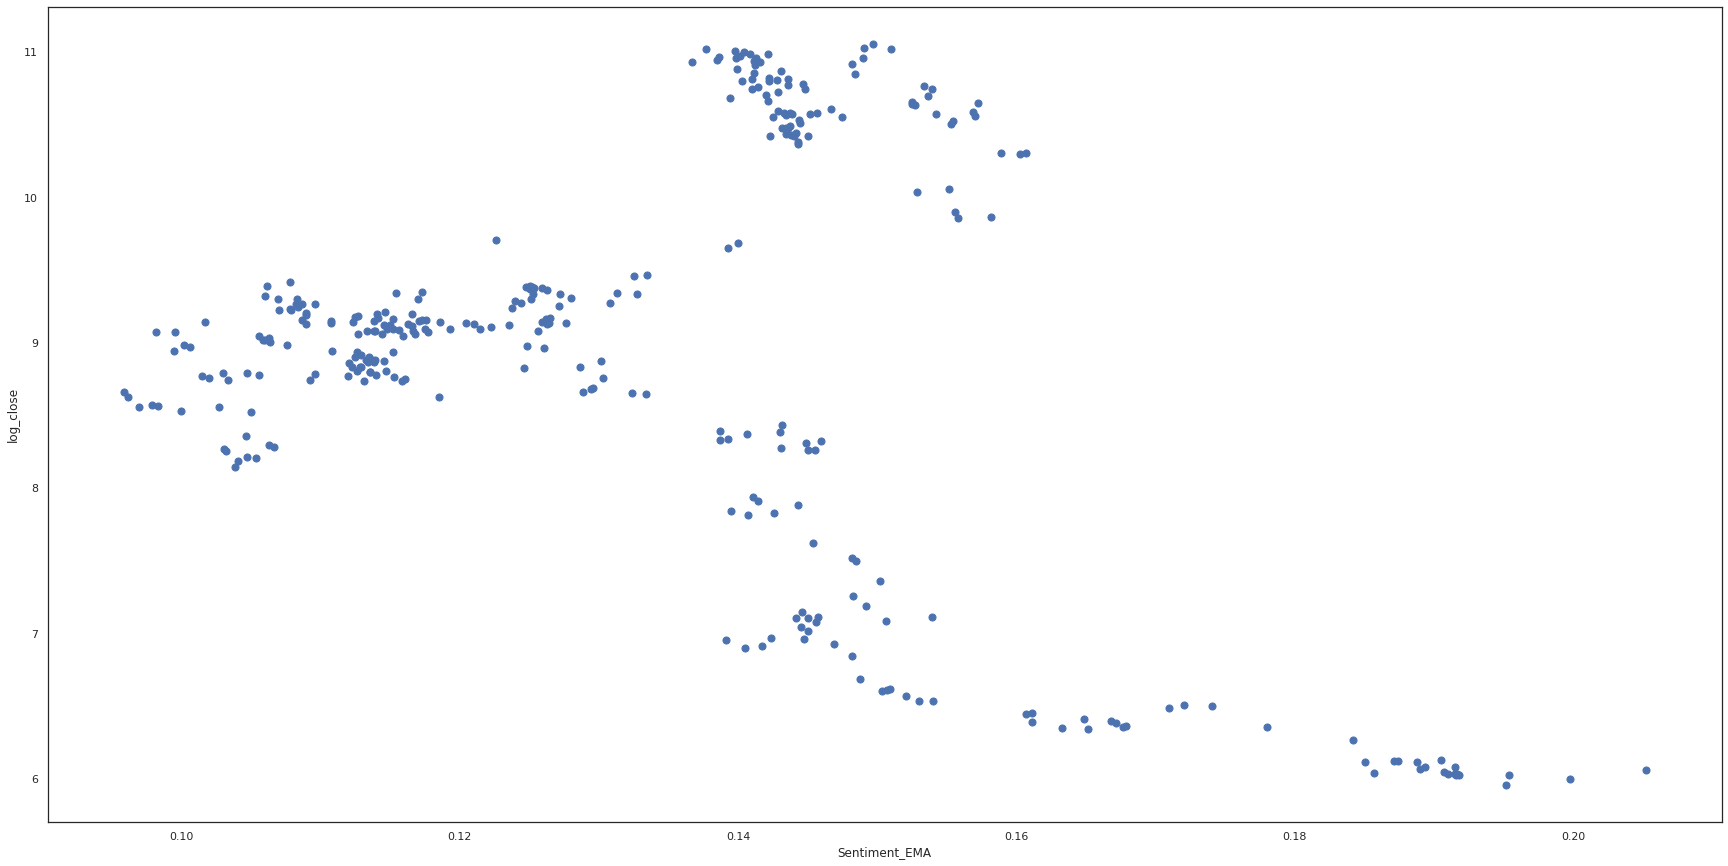

In [50]:
df_model.plot.scatter('Sentiment_EMA','log_close',s=50)

>>> A. Sentiment (X) without Exponential Moving Average

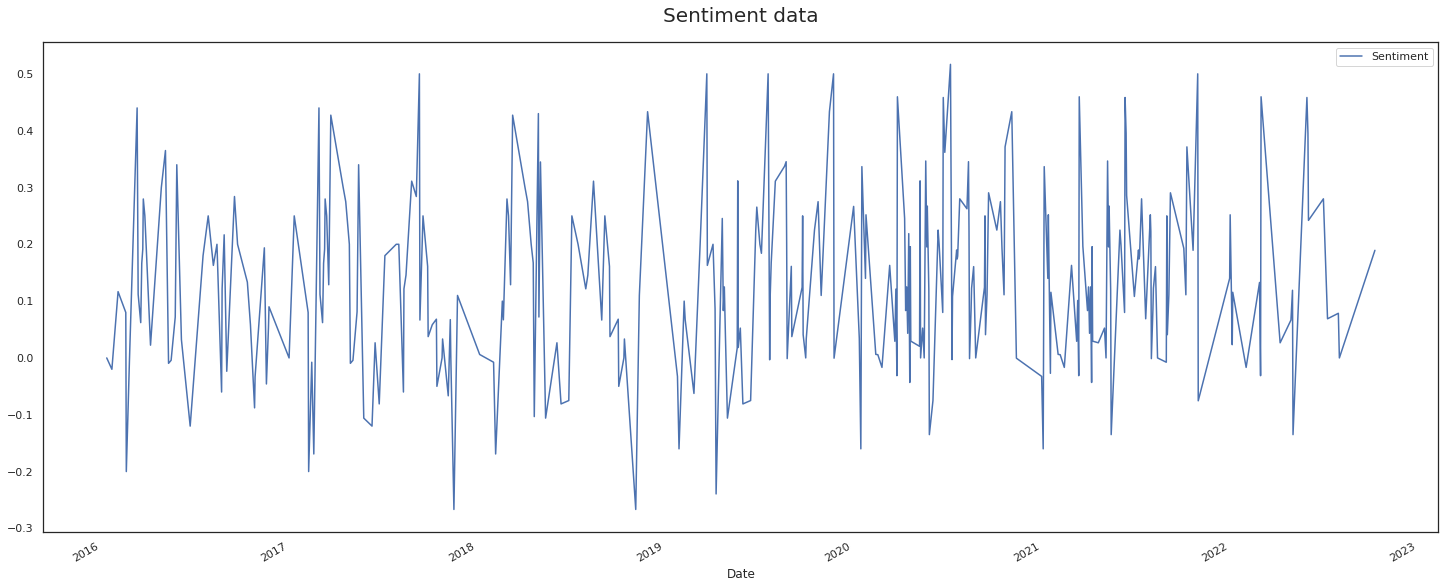

In [51]:
#@title
df_model.plot(x='Date',y=['Sentiment'],figsize=(25,10))
plt.title('Sentiment data',fontsize = 20)
title = 'Sentiment data'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

>>>A. Reducing noise with EMA of 360 days

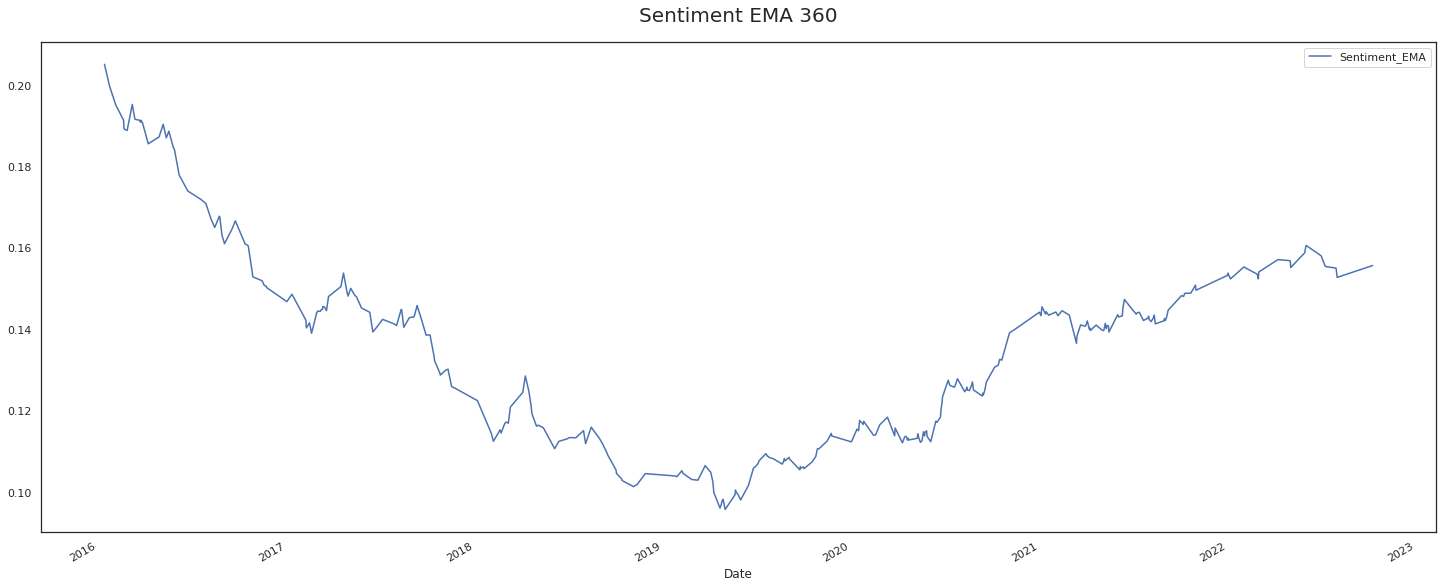

In [52]:
#@title
df_model.plot(x='Date',y=['Sentiment_EMA'],figsize=(25,10))
plt.title('Sentiment EMA 360',fontsize = 20)
title = 'Sentiment EMA 365'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

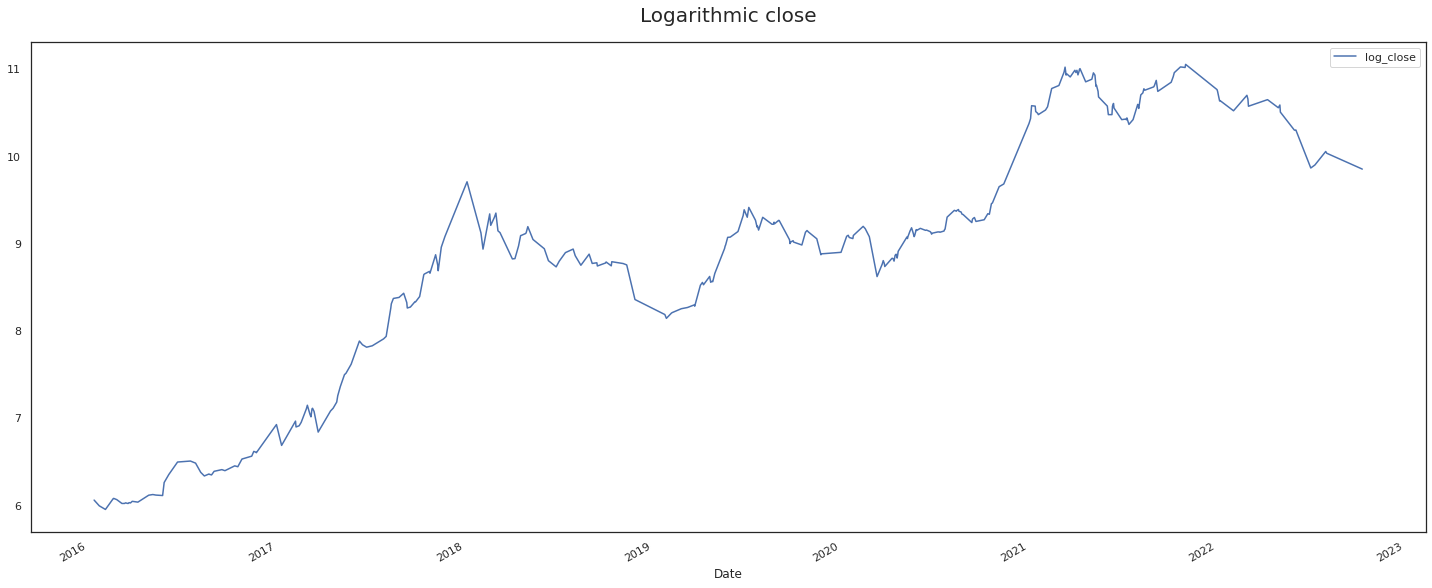

In [53]:
#@title
df_model.plot(x='Date',y=['log_close'],figsize=(25,10))
plt.title('Logarithmic close',fontsize = 20)
title = 'logarithmic close'
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16})
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

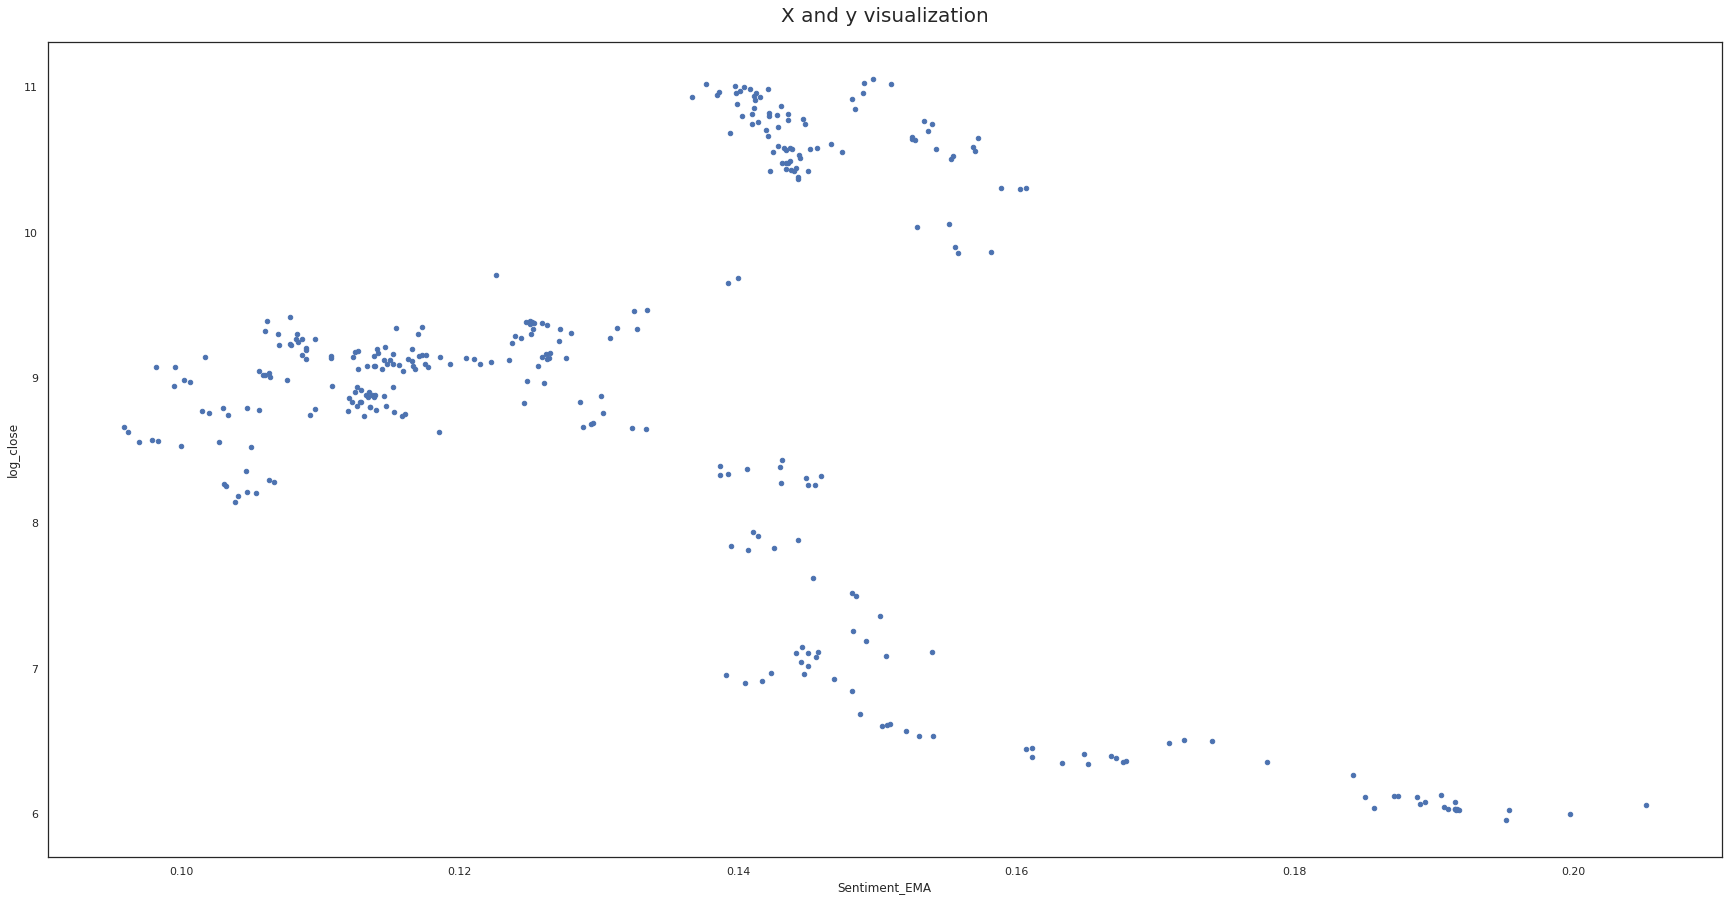

In [54]:
#@title
df_model.plot.scatter(x='Sentiment_EMA',y='log_close')
plt.title('X and y visualization',fontsize = 20)
title = 'x and y visualization'
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 16})
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')






>> 3.2.2.   Creatting train and test data






In [55]:
#Train data
df_model_train = df_model[(df_model.Date > '2018-01-01') & (df_model.Date < '2022-01-01')]
df_model_train.head()

,Date,Day_news,Sentiment,Close,returns,Sent,Wallets,Sentiment_EMA,returns_EMA,Close_EMA,lag_Sentiment_EMA,lag_returns_EMA,Wallets_EMA,log_close,log_sentiment,log_sentiment_EMA,log_Wallets
643,2018-01-07,Inside bitcoin bubble Which? investigates craz...,0.006061,16477.599609,-0.059873,-0.978574,407.0,0.122600,0.011703,3838.340005,0.124885,0.008914,333.279633,9.709757,-5.105945,-2.098824,6.008813
668,2018-02-03,Will Cryptocurrency Replace National Currencie...,-0.007576,9174.910156,0.038973,-1.039872,321.0,0.114572,0.007507,4897.059732,0.116053,0.008838,365.694266,9.124228,NaN,-2.166553,5.771441
672,2018-02-07,Over 800 cryptocurrencies dead bitcoin CNBC ...,-0.169048,7621.299805,-0.017114,-inf,453.0,0.112614,0.006472,4957.585519,0.115177,0.008669,367.016149,8.938702,NaN,-2.183792,6.115892
685,2018-02-20,Coders Are Trying Connect Bitcoin's Lightning ...,0.100000,11403.700195,0.015893,-3.153846,469.0,0.115413,0.008316,5286.183468,0.114183,0.006976,400.896802,9.341693,-2.302585,-2.159234,6.150603
687,2018-02-22,world's mostused cryptocurrency bitcoin Offlin...,0.067045,10005.000000,-0.064114,1.678436,520.0,0.114648,0.007525,5342.100882,0.114575,0.007865,402.684036,9.210840,-2.702384,-2.165893,6.253829


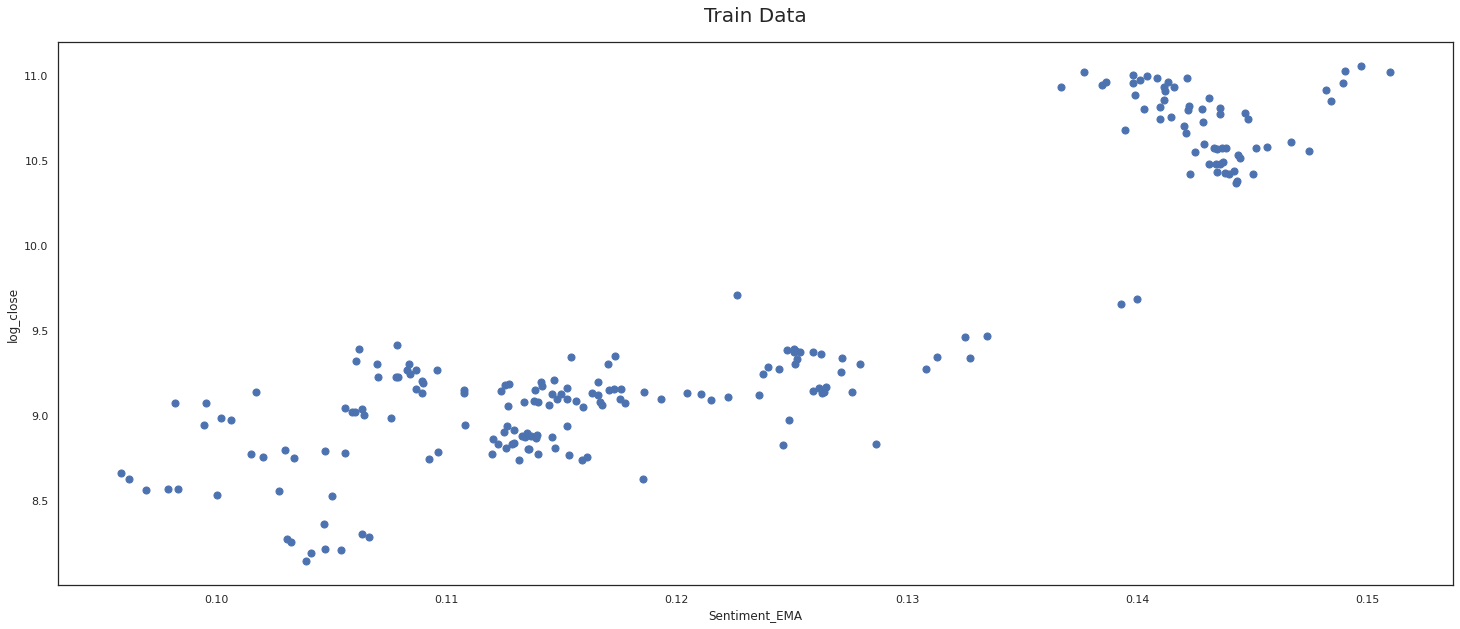

In [56]:
#@title
df_model_train.plot.scatter(x='Sentiment_EMA',y='log_close',s=50,figsize=(25,10),color='b')
df_model_train.drop(columns='Date',inplace=True)
plt.title('Train Data',fontsize = 20)
title = 'Train Data (2018-2022)'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

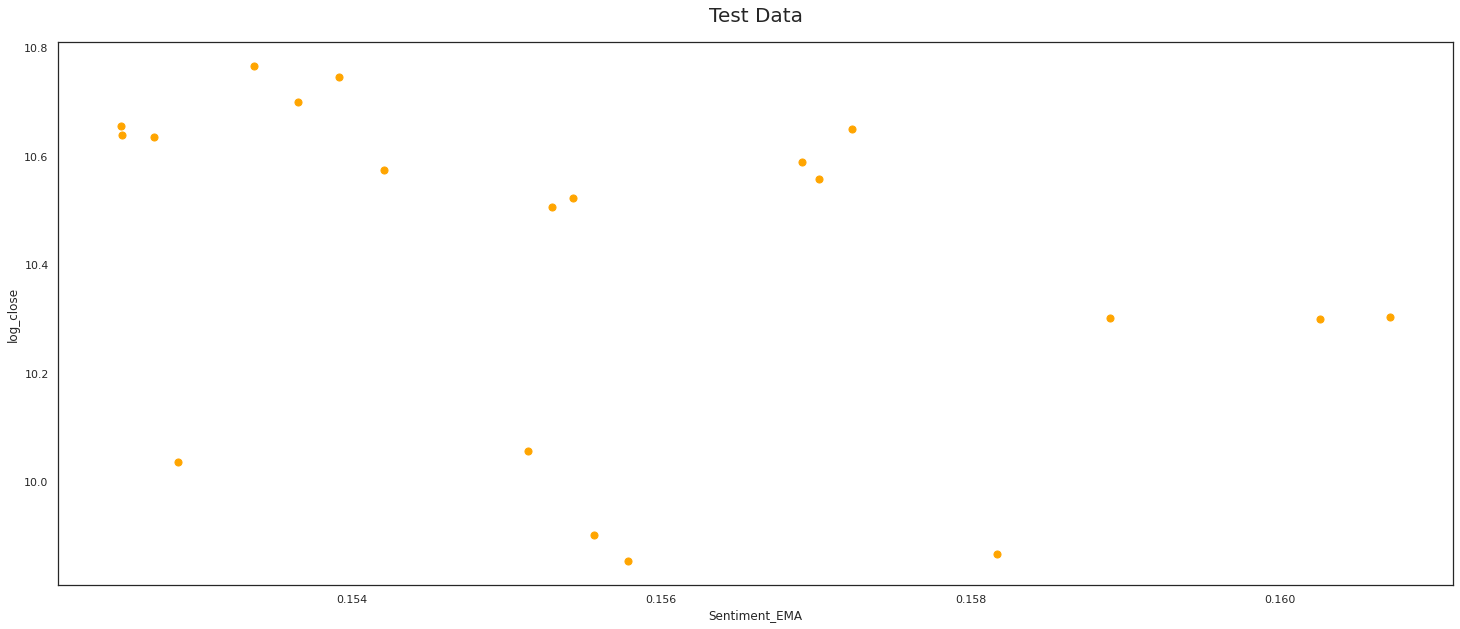

In [57]:
#@title
#Test data
df_model_test = df_model[(df_model.Date > '2022-01-01')]
df_model_test.plot.scatter(x='Sentiment_EMA',y='log_close',s=50,figsize=(25,10),color='orange')
plt.title('Test Data',fontsize = 20)
title = 'Test Data (>2022)';
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

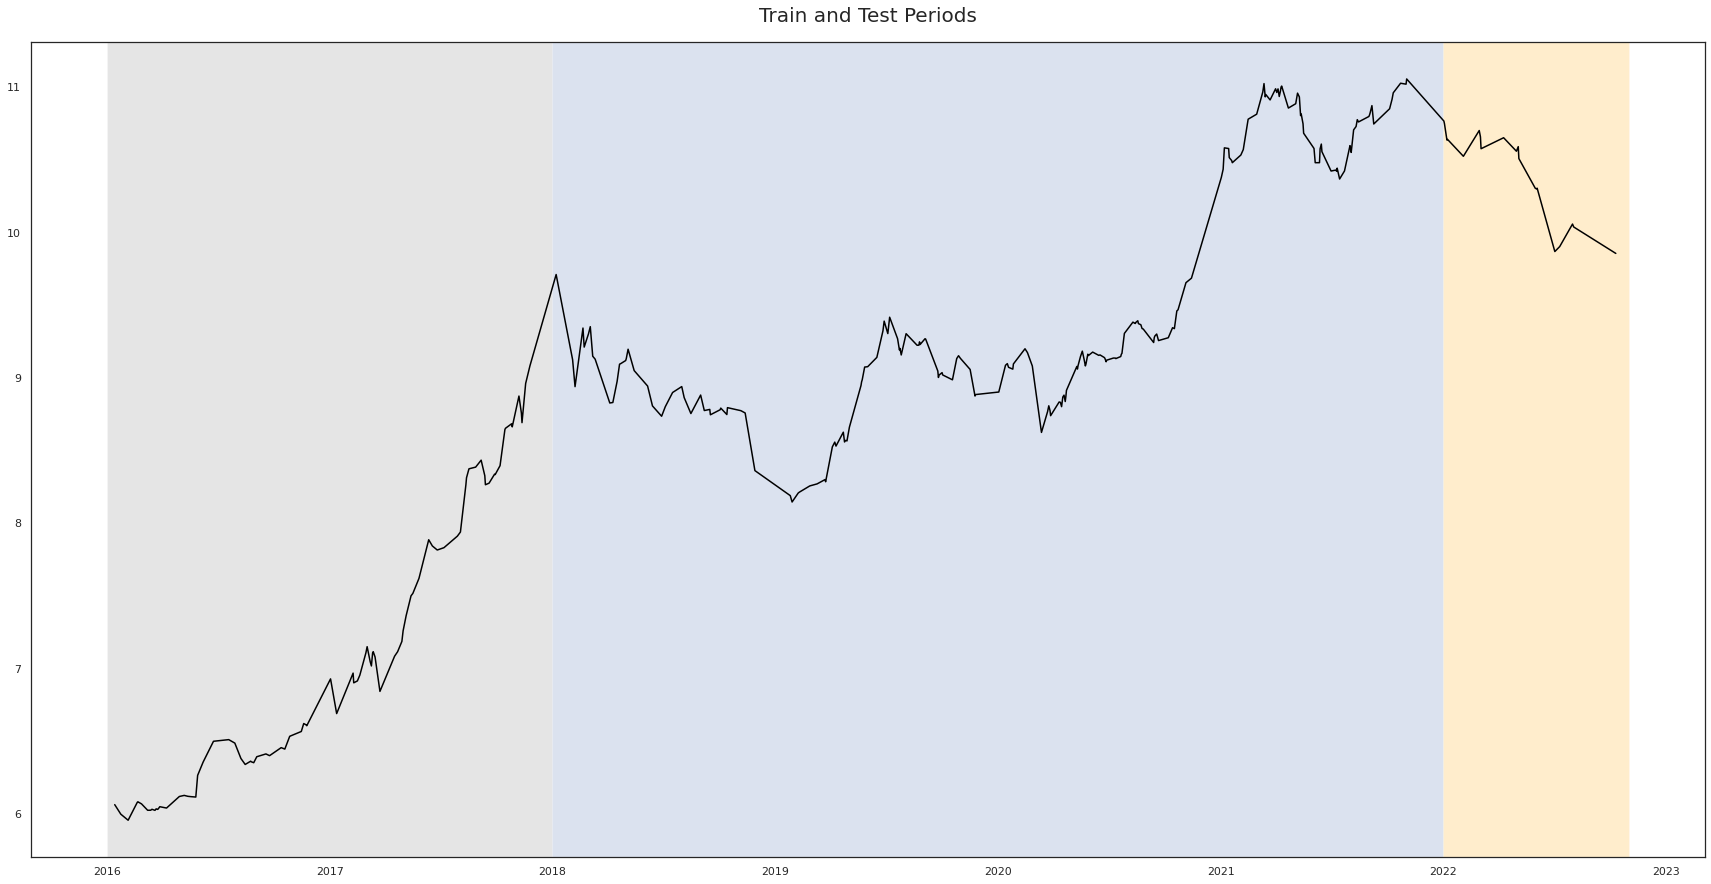

In [58]:
#@title
fig, ax = plt.subplots()
ax.plot(df_model.Date, df_model.log_close,'black')
ax.set_title('Train and Test Periods',fontdict={'size':'20'})
# ax.grid()
ax.axvspan(pd.to_datetime('2016-01-01'),pd.to_datetime('2018-01-01'), facecolor='grey', alpha=0.2)
ax.axvspan(pd.to_datetime('2018-01-01'),pd.to_datetime('2022-01-01'), facecolor='b', alpha=0.2)
ax.axvspan(pd.to_datetime('2022-01-01'),pd.to_datetime('2022-11-01'), facecolor='orange', alpha=0.2)

title = 'Train and Test Time Spans'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')
plt.show()

>> 3.2.3.   fitting data and predictions


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
#X
features = 'Sentiment_EMA'
X_train = df_model_train[features]
X_train = X_train.to_numpy().reshape(-1,1)
#y
target = 'log_close'
y_train = df_model_train[target]

#BaseLine
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

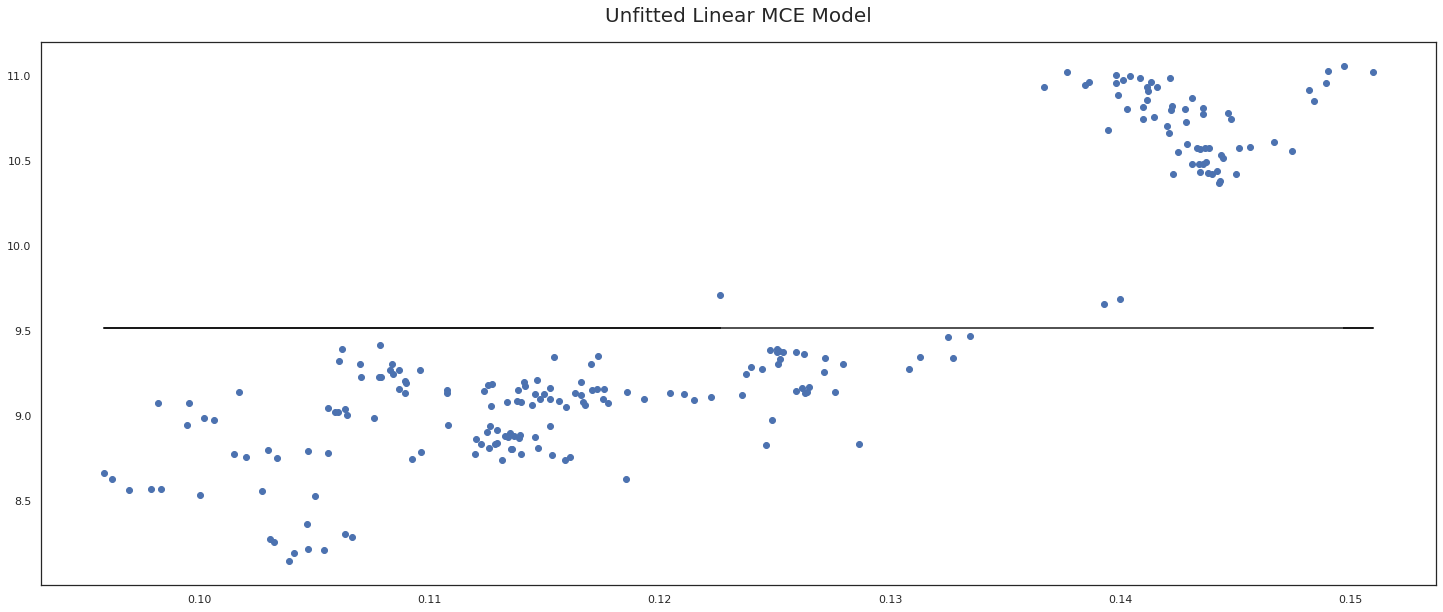

In [60]:
#@title
plt.figure(figsize=(25,10))
plt.plot(X_train, y_pred_baseline, color = 'k', label = 'Baseline model')
plt.scatter(X_train, y_train,color='b')
plt.title('Unfitted Linear MCE Model',fontsize = 20)
title = 'Untrained Linear MCE Model'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

In [78]:
linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

y_pred_training = linear_model.predict(X_train) #yhat predictions

mae_training = mean_absolute_error(y_train, y_pred_training)

R2 = 0.8096249136850192
MSE = 88.8540391345836
MAE = 9.391325641714495


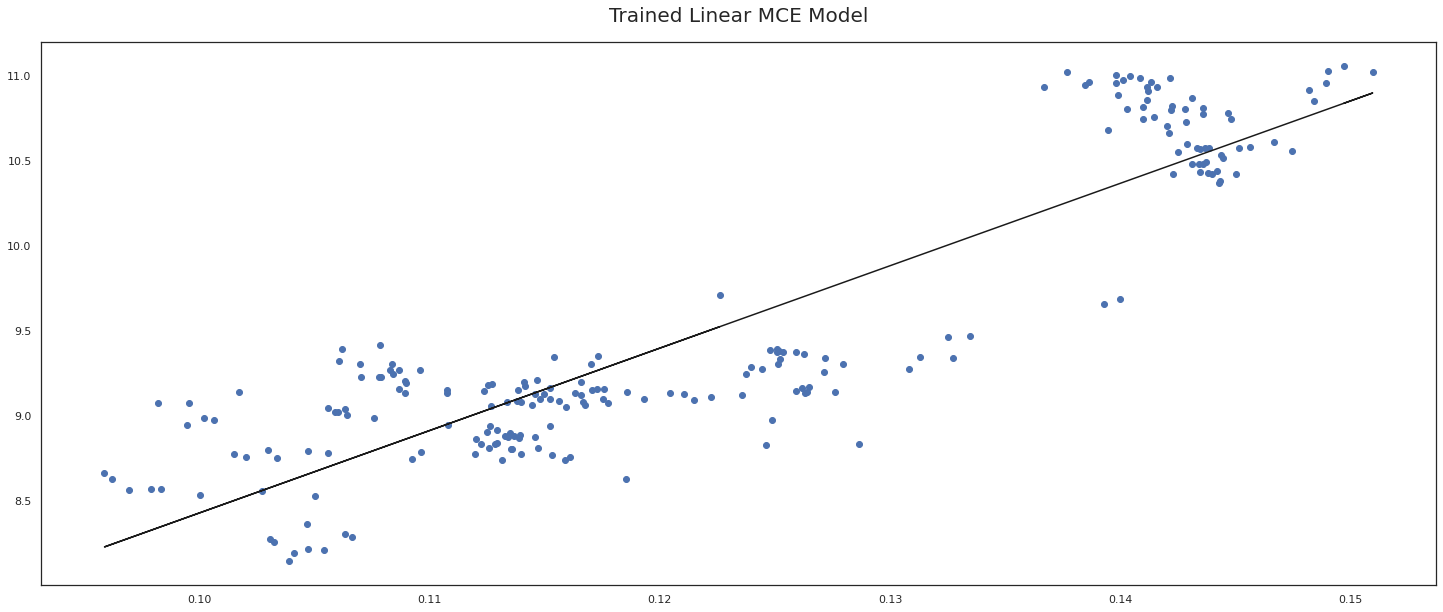

In [62]:
#@title
plt.figure(figsize=(25,10))
plt.plot(X_train, linear_model.predict(X_train), color = 'k', label = 'linear model')
plt.title('Trained Linear MCE Model')
plt.scatter(X_train, y_train,color='b')
plt.title('Trained Linear MCE Model',fontsize = 20)
title = 'Trained Linear MCE Model'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')
print(f'R2 = {linear_model.score(X_train,y_train)}')
print(f'MSE = {mean_squared_error(y_train, X_train)}')
print(f'MAE = {mean_absolute_error(y_train, X_train)}')

>> 3.2.4.   Testing Model


In [63]:
#Imported funtions to see predicted R2 to detect overfitting
def press_statistic(y_true, y_pred, xs):
    """
    Calculation of the `Press Statistics <https://www.otexts.org/1580>`_
    """
    res = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y_true, y_pred, xs):
    """
    Calculation of the `Predicted R-squared <https://rpubs.com/RatherBit/102428>`_
    """
    press = press_statistic(y_true=y_true,
                            y_pred=y_pred,
                            xs=xs
    )

    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - press / sst
 
def r2(y_true, y_pred):
    """
    Calculation of the unadjusted r-squared, goodness of fit metric
    """
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

In [64]:
print(f'Testing Overfitting with Predicted R2: {predicted_r2(y_train,y_pred_training,X_train)}')

Testing Overfitting with Predicted R2: 0.8078253070378272


In [65]:
X_test = df_model_test[features]
X_test = X_test.to_numpy().reshape(-1,1)

y_test = df_model_test[target]
y_test = y_test.to_numpy().reshape(-1,1)


y_pred_test = pd.Series(linear_model.predict(X_test))

mae_test = mean_absolute_error(y_test, y_pred_test)


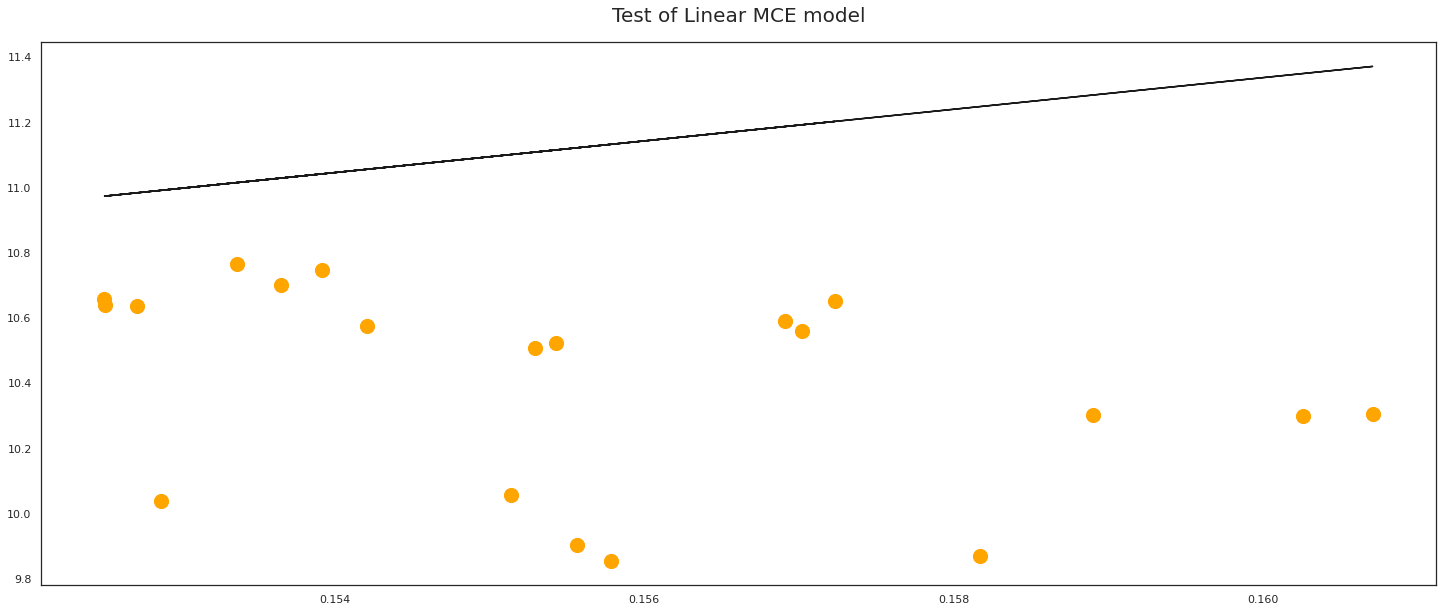

In [66]:
#@title
plt.figure(figsize=(25,10))
plt.plot(X_test, y_pred_test, color = 'k', label = 'linear model')
plt.scatter(X_test, y_test,color='orange',s=200)
plt.title('Test of Linear MCE model',fontsize = 20)
title = 'Test of Linear MCE model'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

> **3.3 Exponential/polynomial OLS regression**

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [68]:
from sklearn.utils.fixes import sklearn

poly_data = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly, X_test_poly = poly_data.fit_transform(X_train), poly_data.fit_transform(X_test)

model = LinearRegression()
model = model.fit(X_train_poly,y_train)

coefficient_2 = model.coef_
intercept_2 = model.intercept_

R2 =  0.8585387385963705


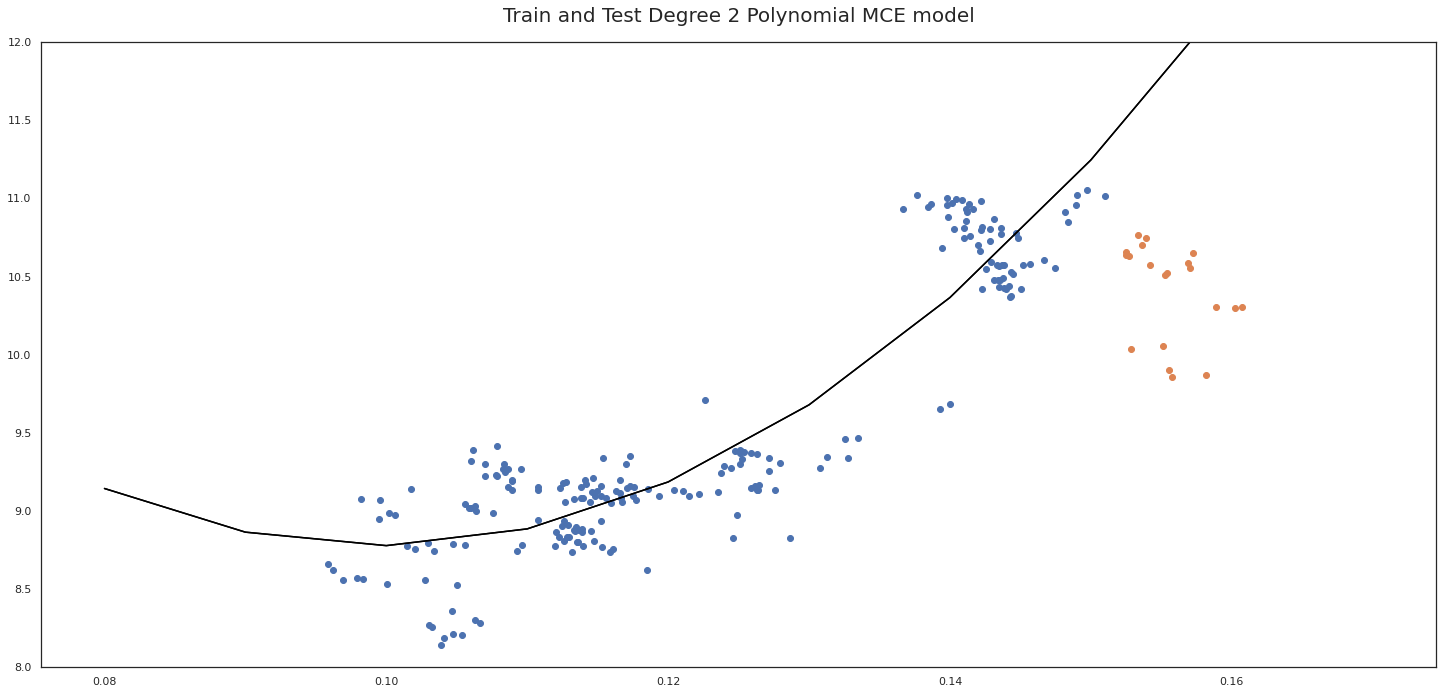

In [69]:
#@title
x_axis = np.arange(0.08,0.18,0.01)
equation = intercept_2 + coefficient_2[0] * x_axis + coefficient_2[1] * x_axis**2
#plotting
plt.figure(figsize=(25,11.5))
plt.scatter(X_train,y_train)
plt.plot(x_axis,equation,color='Black')
plt.scatter(X_test,y_test)
plt.plot(x_axis,equation,color='black')
plt.ylim(8,12)
#R2
print('R2 = ',model.score(X_train_poly,y_train))
plt.title('Train and Test Degree 2 Polynomial MCE model',fontsize=20)
title = 'Train and test of Degree 2 Polynomial MCE model'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

In [70]:
print(f'Testing Overfitting with Predicted R2: {predicted_r2(y_train,model.predict(X_train_poly),X_train_poly)}')

Testing Overfitting with Predicted R2: 0.8557858407330807


Test 2

In [71]:
X = X_train
y = y_train

poly_features = PolynomialFeatures(degree=4,include_bias=False)
X_poly = poly_features.fit_transform(X)

reg = LinearRegression()

reg.fit(X_poly, y)

X_vals = np.arange(0.09,0.16,0.01).reshape(-1,1)
X_vals_poly = poly_features.transform(X_vals)
y_vals = reg.predict(X_vals_poly)
coefficient = list(reg.coef_)

R2 = 0.8752031863420644


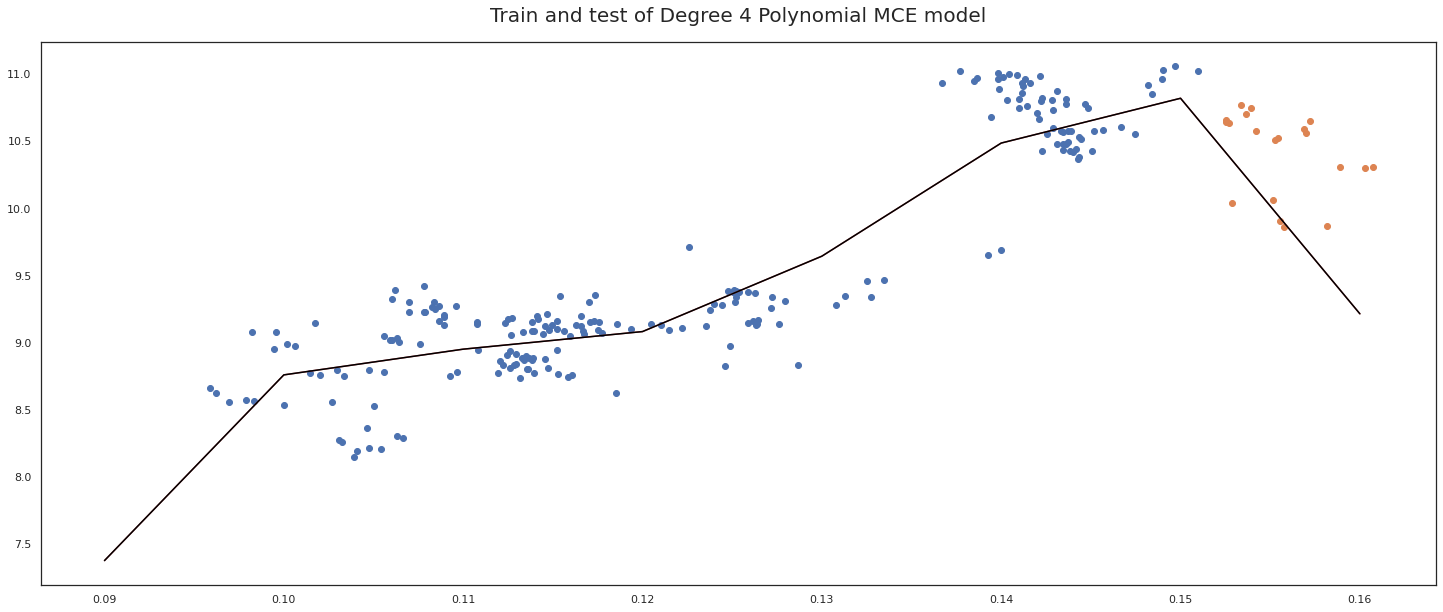

In [72]:
#@title
print(f'R2 = {reg.score(X_poly,y_train)}')
#Plotting
plt.figure(figsize=(25,10))
plt.scatter(X,y)
plt.plot(X_vals,y_vals,color='r')
plt.scatter(X_test,y_test)
plt.plot(X_vals,y_vals,color='black')
plt.title('Train and test of Degree 4 Polynomial MCE model',fontsize=20);
title = 'Train and test of Degree 4 Polynomial MCE model'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

In [73]:
print(f'Testing Overfitting with Predicted R2: {predicted_r2(y_train,reg.predict(X_poly),X_train_poly)}')

Testing Overfitting with Predicted R2: 0.8727671718805068


>**3.4 Using RNN from Facebook Prophet to predict sentiment and *price***

In [112]:
import fbprophet as fbp
model = fbp.Prophet(daily_seasonality=False)
df_model_fbp_train = df_model[(df_model.Date > '2018-01-01')]# & (df_model.Date < '2022-10-01')]

df_model_fbp_test = df_model[(df_model.Date > '2022-01-01')]
X_test_FBP = df_model_fbp_test[['Date','Sentiment_EMA']]
X_test_FBP.rename(columns={'Date':'ds','Sentiment_EMA':'y'},inplace=True)
X_train_FBP = df_model_fbp_train[['Date','Sentiment_EMA']]
X_train_FBP.rename(columns={'Date':'ds','Sentiment_EMA':'y'},inplace=True)

model.fit(X_train_FBP) #fitting data

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future) #predicting
predicted_sentiment = forecast[['ds','yhat']]
predicted_sentiment = forecast[(forecast.ds > df_model['Date'].iloc[-1])]

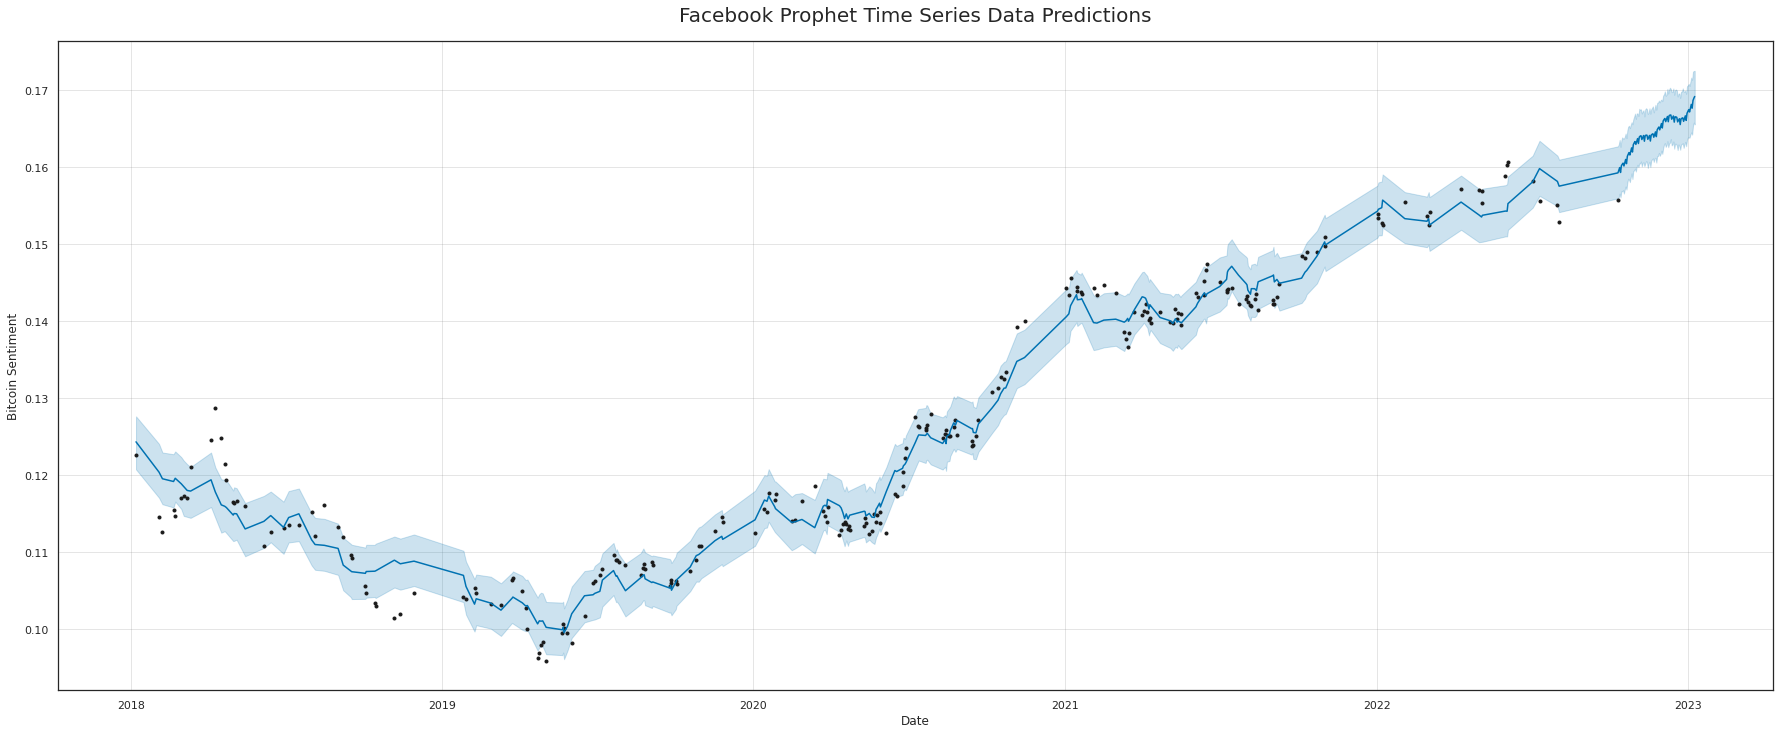

In [113]:
#@title
#
model.plot(forecast,xlabel = 'Date', ylabel = 'Bitcoin Sentiment',figsize=(25,10))
plt.title('Facebook Prophet Time Series Data Predictions',fontsize=20)
title = 'Time Series ML Data Predictions'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

>**3.5 Testing and creating the ensemble model predictions on predicted time series data**

In [116]:
import datetime

X_test_FBP_yhat = list(predicted_sentiment.yhat.values)
dates = list(predicted_sentiment.ds.values)
all_sentiment = (list(df_model_fbp_train.Sentiment_EMA.values))

for i in X_test_FBP:
    if type(i)==float:
        all_sentiment.append(i)
    else:
      None

coefficient = [float(i) for i in coefficient]
intercept = reg.intercept_
beta1 = coefficient[0]
beta2 = coefficient[1]
beta3 = coefficient[2]
beta4 = coefficient[3]

#linear models
linear_Close = []
for S in X_test_FBP_yhat:
    
    log_close = linear_model.intercept_ + S*linear_model.coef_
    linear_Close.append(np.exp(log_close))

#polynomial 4 model
poly4_Close = []
for S in X_test_FBP_yhat:
    
    log_close = intercept + beta1 * S + beta2 * S**2 + beta3 * S**3 + beta4 * S**4
    poly4_Close.append(np.exp(log_close))

model_pred = [] #models ensemble predictions
for i,v in zip(linear_Close,poly4_Close):
    model_pred.append(0.15*i+0.85*v)

#----------------------------------------------------------------------
#comparing to actual price 
start = predicted_sentiment['ds'].iloc[0]
today = datetime.date.today()
end = today - datetime.timedelta(days = 1)
price = pd.DataFrame(yf.download(tickers=ticker,interval='1d',start=start,end=end)['Close'])
price.reset_index(inplace=True)
price['Date'] = price['Date'].astype('datetime64')

[*********************100%***********************]  1 of 1 completed


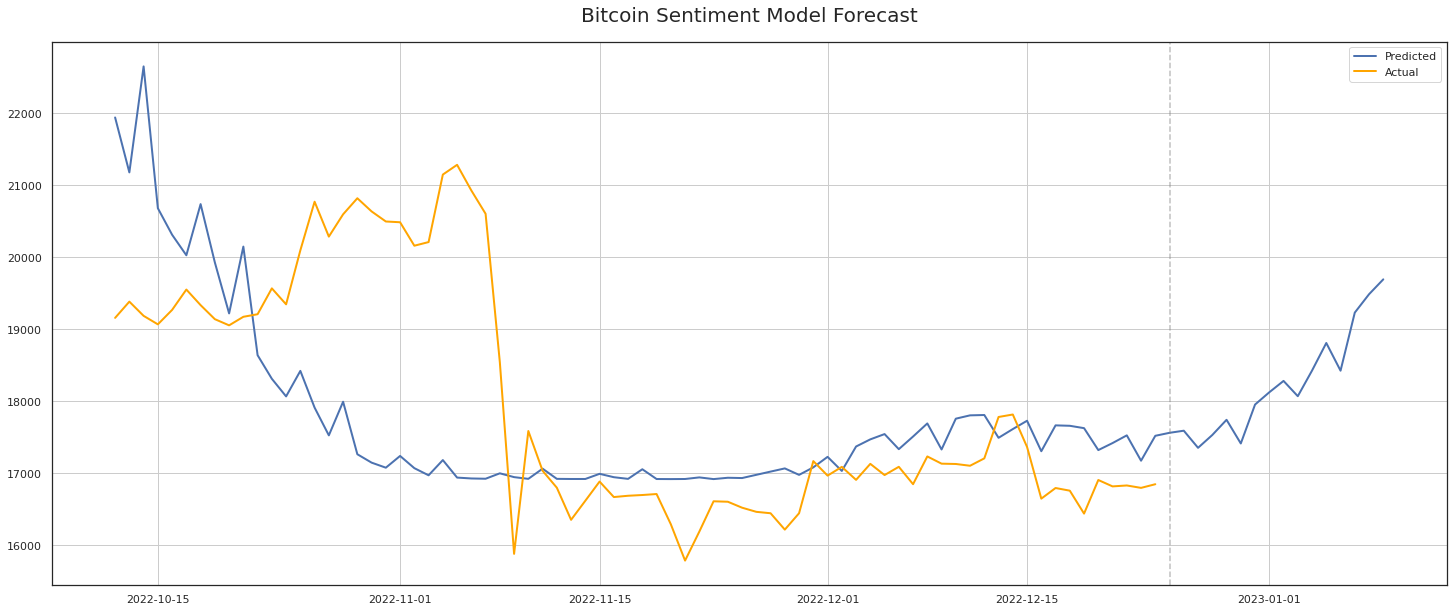

In [117]:
#@title
#----------------------------------------------------------------------
#Plotting model predictions based on FB prophet sentiment
plt.figure(figsize=(25,10))
plt.plot(predicted_sentiment.ds,model_pred,color='b', label='Predicted',linewidth=2)
plt.title('Bitcoin Price Forecast')
#----------------------------------------------------------------------
#Plotting comparison
plt.plot(price.Date,price.Close,color='orange',label='Actual',linewidth=2)
yesterday = datetime.date.today() - datetime.timedelta(days = 1)
plt.axvline(pd.Timestamp(yesterday),color='grey',alpha=0.5,linestyle='dashed')
plt.title('Bitcoin Sentiment Model Forecast',fontsize=20)
plt.grid()
plt.legend(loc="upper right");

title = 'Bitcoin Price Forecast with Sentiment (90 days forward)'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')

>**3.6 Backtesting the Ensemble Model**

In [224]:
df_backtest = df_model[(df_model.Date > '2018-01-01')]
df_backtest = df_backtest[['Date','Sentiment_EMA','Close']]
forecast = model.predict(X_train_FBP)

#creating predictions of backtest
predicted_close = []

#Final model
for S in forecast['yhat']:
    linear_pred = np.exp(linear_model.intercept_ + S*linear_model.coef_)
    exp_pred = np.exp(intercept + beta1 * S + beta2 * S**2 + beta3 * S**3 + beta4 * S**4)
    model_pred = 0.10*linear_pred+0.90*exp_pred
    predicted_close.append(model_pred)

df_backtest['Predicted_Close'] = predicted_close

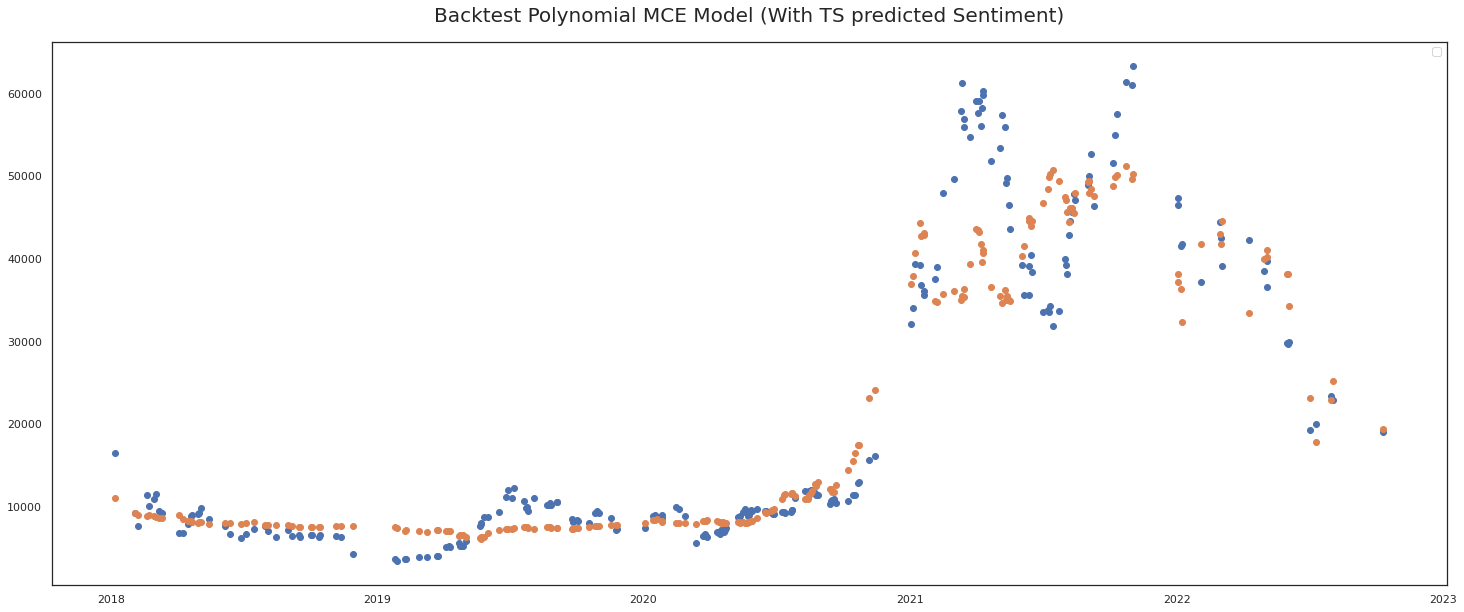

In [225]:
#@title
plt.figure(figsize=(25,10))
plt.scatter(df_backtest.Date,df_backtest.Close)
plt.scatter(df_backtest.Date,df_backtest.Predicted_Close)
plt.legend()
plt.title('Backtest Polynomial MCE Model (With TS predicted Sentiment)',fontsize=20)
title = 'Backtest Polynomial MCE Model (with Sentiment EMA365)'
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Outputs/{title}.png')